<a href="https://colab.research.google.com/github/shub0411/Bike_Sharing_Demand_Prediction/blob/main/pj_2_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
%matplotlib inline 
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
from scipy import stats
from datetime import datetime
import datetime as dt

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# CSV file loaction path
bike_df=pd.read_csv('/content/drive/MyDrive/capstone project 2/SeoulBikeData.csv', encoding ='latin')

# ***Data Exploration And Data Cleaning***

In [ ]:
# Check 1st Five rows
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Check last 5 rows
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# different columns name
bike_df.columns


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Check the info of dataset to know the data types of columns or variable
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
## Check the Summary of Bike data to egt mean,max,25%,50%,75% etc
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
# Check Total rows and Columns in dataset.
# Rows= 8760
# Columns=14
print(f' The shape of dataset is {(bike_df.shape)} \n Total Rows are : {(bike_df.shape)[0]}\n Total Columns are : {(bike_df.shape)[1]}')

 The shape of dataset is (8760, 14) 
 Total Rows are : 8760
 Total Columns are : 14


# **Observations**
1)Null values/missing values- 0

2)Date- columns need to convert into proper data type.

3)Columns to convert into numeric(for modelling Purpose)

*   seasons
*   holiday
*   functioning day

4) Rename columns-


*   Temperature(°C)

*   Humidity(%)

*   Wind speed (m/s)
*   Visibility (10m)


*   Solar Radiation (MJ/m2)


*   Dew point temperature(°C)

*   Rainfall(mm)
*   Snowfall (cm)


*   Rented Bike Count,Functioning Day(Beacuse white spaces and variables having units in brackets which makes difficult to copy variable name.)















In [ ]:
# check for Null values in our bike data
# as we can see we don't have any null values.
bike_df.isna().sum()
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


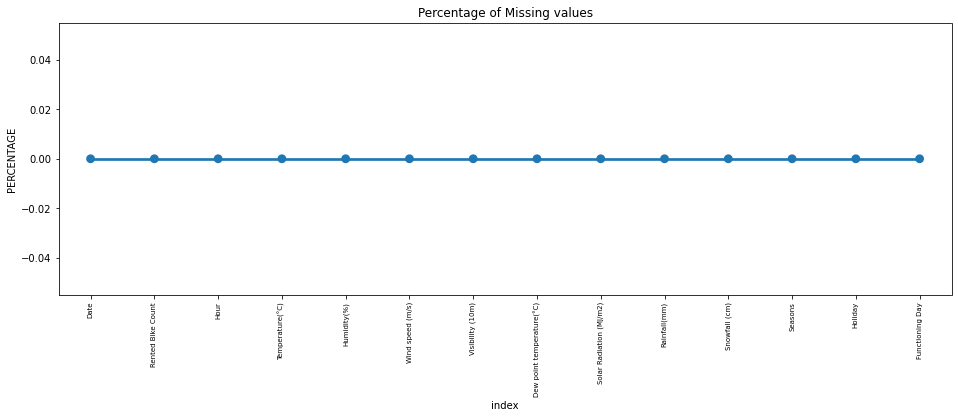

In [ ]:
# Visulaizing null values
missing = pd.DataFrame((bike_df.isnull().sum())*100/bike_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [ ]:
# duplicate values in data set
value=len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


In [ ]:
#Since the variables having units with name, renaming columns for better variable analysis.
bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed',
                       'Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature', 'Solar Radiation (MJ/m2)':'Solar_Radiation',
                        'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'},inplace=True)

In [ ]:
# Changing the "Date" column into three "year","month","day" column
bike_df['Date'] = bike_df['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [ ]:
# Creating new columns 'Month', 'Year' ,'Day.
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [ ]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
# We can Drop Day ,Date and Year columns.
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)

In [ ]:
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [ ]:
#Get distinct categories counts for for Weekdays_or_weekend categories
bike_df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

In [ ]:
#Get distinct categories counts forSeasons categories
bike_df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
#Get distinct categories counts for Holiday categories
bike_df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
#Get distinct categories counts for Functioning_Day categories
bike_df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [ ]:
# create numeric columns list.
numeric_col=bike_df.describe().columns.tolist()
numeric_col

['Rented_Bike_Count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall',
 'month',
 'weekdays_weekend']

In [ ]:
# create categorical column list
categorical_columns= list(set(bike_df.columns) - set(bike_df.describe().columns))
categorical_columns

['Holiday', 'Functioning_Day', 'Seasons']

# **EDA**

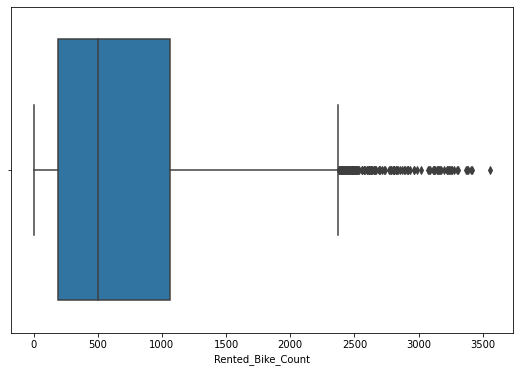

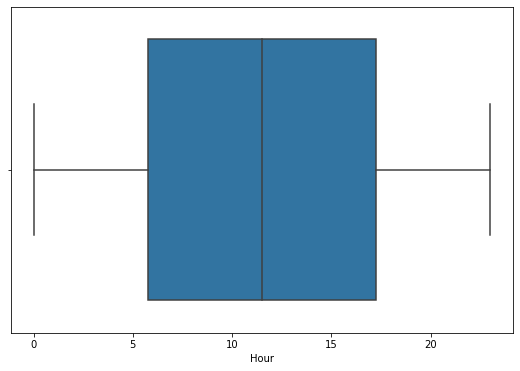

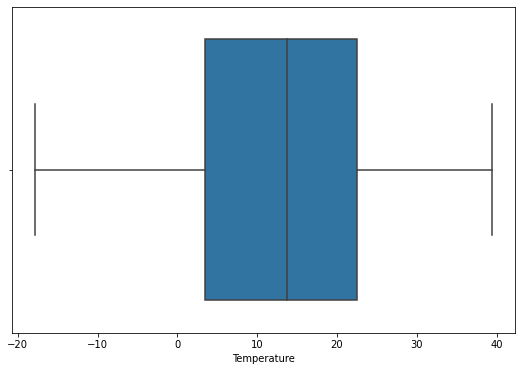

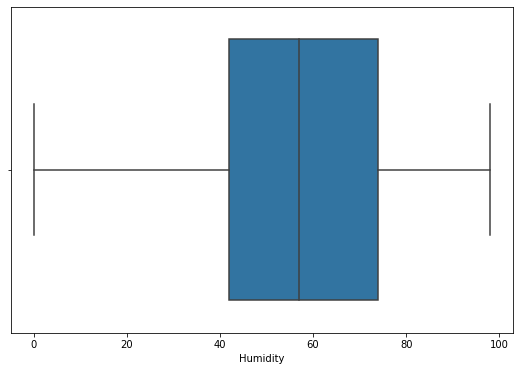

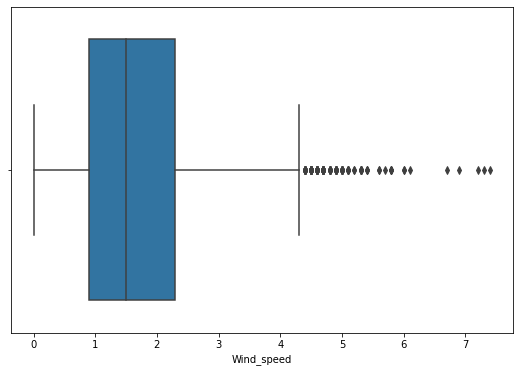

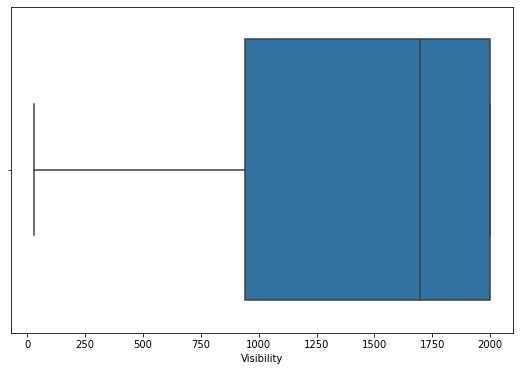

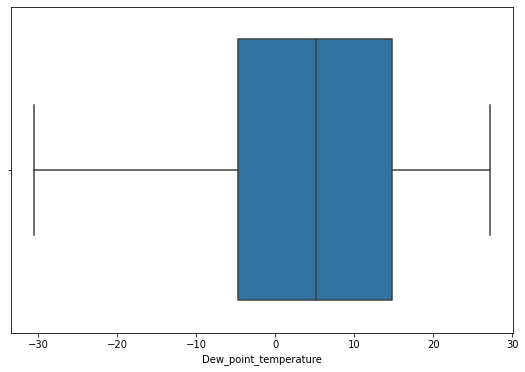

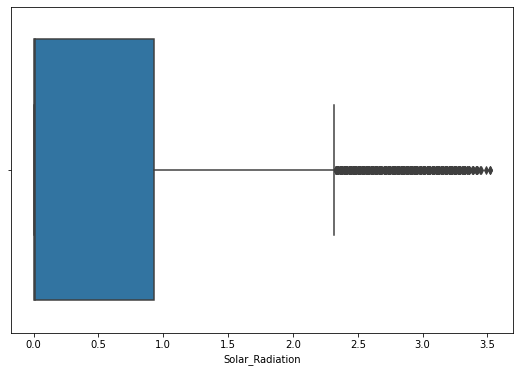

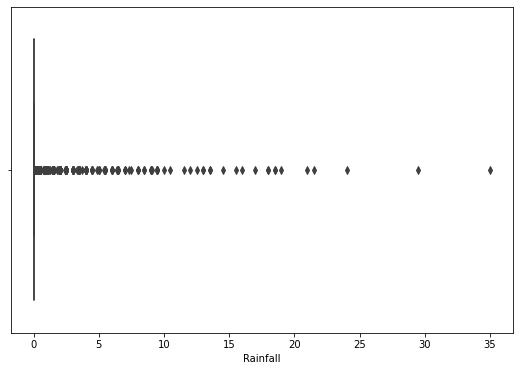

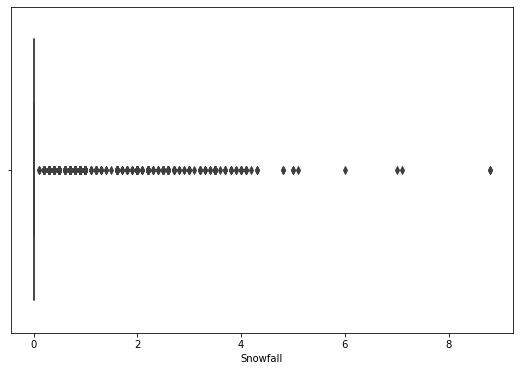

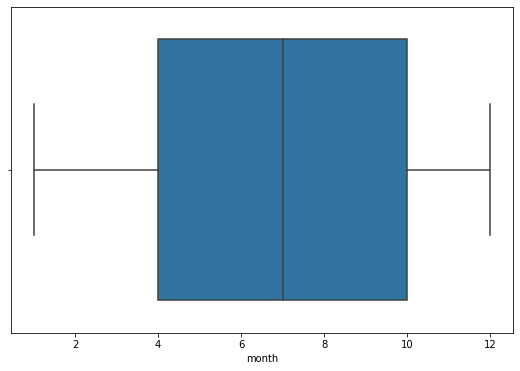

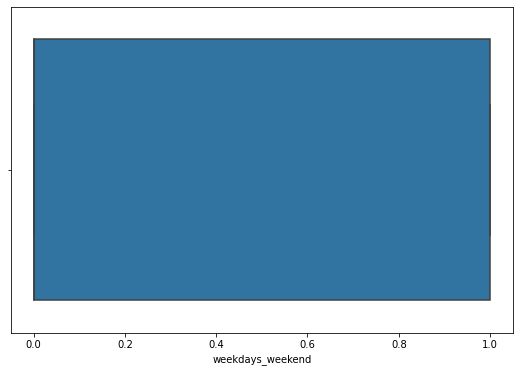

In [ ]:
# priting box plot of numeric columns to check oultliers
for col in numeric_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.boxplot(x=bike_df[col])

## GRAPHS

# Seasons

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

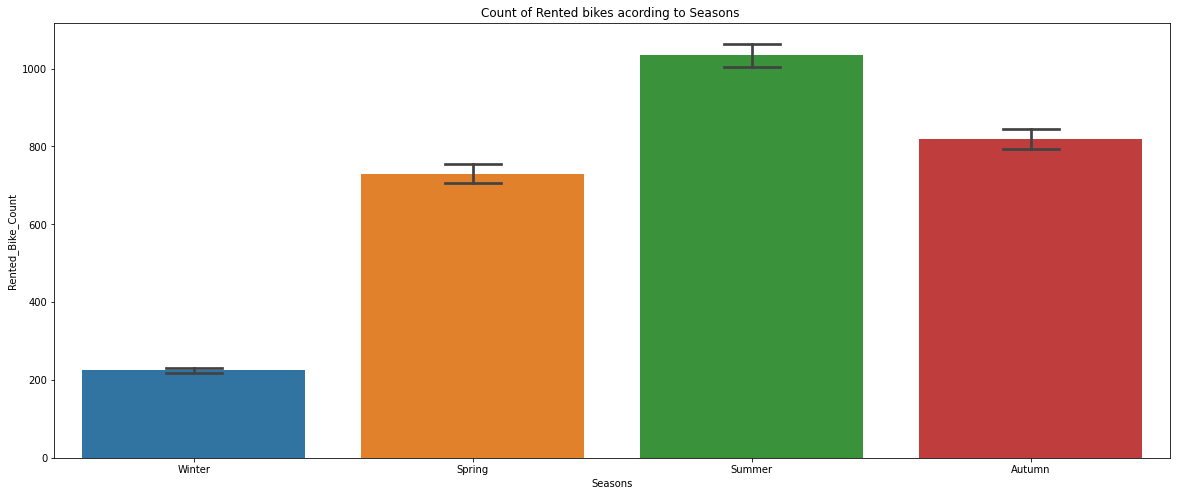

In [ ]:
# Bike Rental trend with respect to Seasons.
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

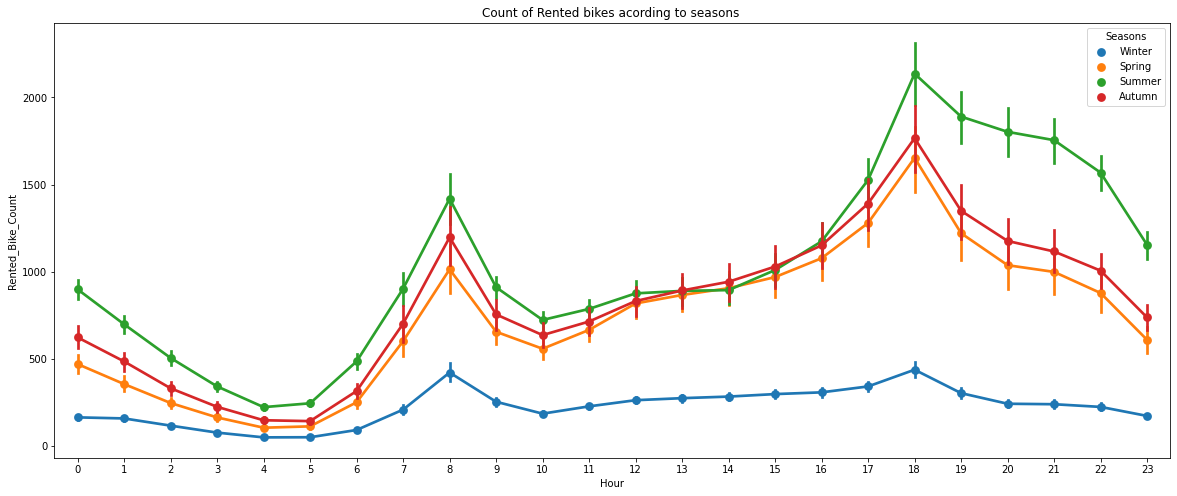

In [ ]:
## Bike Rent Count trend with respect Hours on Seasons.
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

## HOURS COUNTS

[Text(0.5, 1.0, 'Count of Rented bikes acording to HOURS ')]

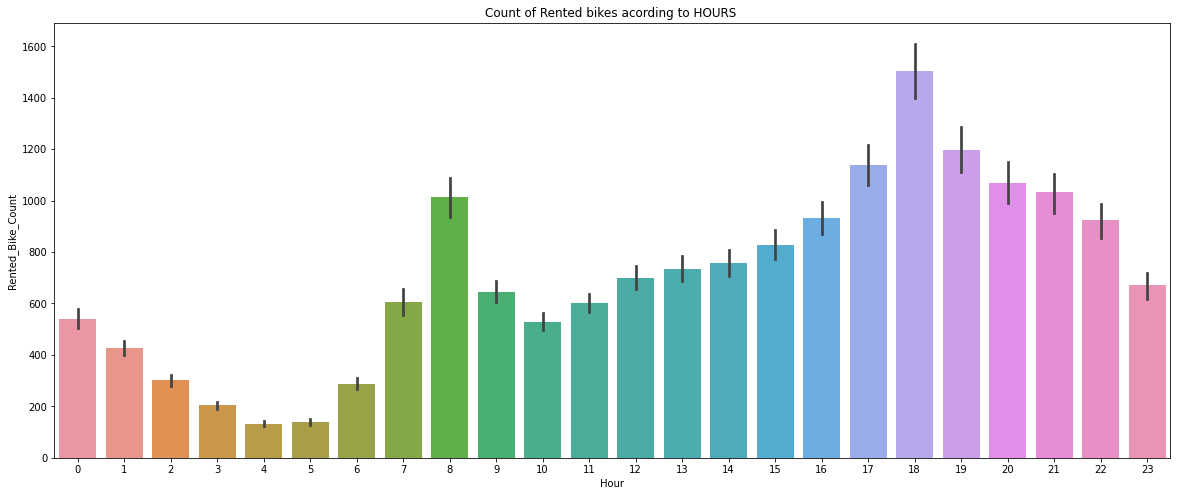

In [ ]:
## Bike Rent Count trend with respect Hours
fig,ax=plt.subplots(figsize=(20,8))
p=sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count',ax=ax)
ax.set(title='Count of Rented bikes acording to HOURS ')



Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Functioning day')

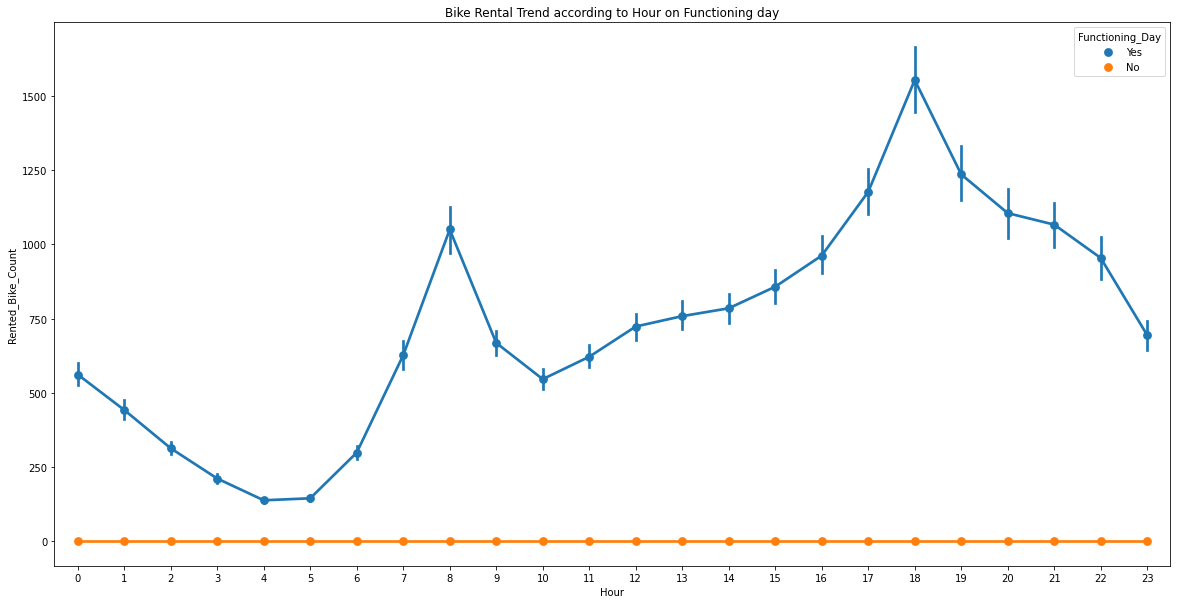

In [ ]:
# Bike Rental trend with respect to Hour on Functioning day.
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_df['Hour'],y=bike_df['Rented_Bike_Count'],hue=bike_df['Functioning_Day'])
plt.title("Bike Rental Trend according to Hour on Functioning day")

Here the trend for functioning day is same as of No holiday. Only the difference is on No functioning day there is no bike rentals.

## *HOLIDAYS*

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

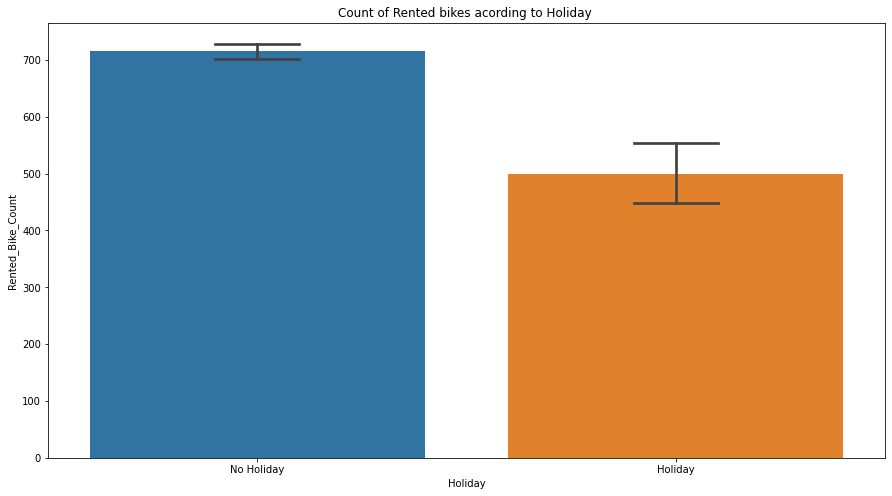

In [ ]:
# Bike Rental trend with respect to Holidays.
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Holiday / No Holiday')

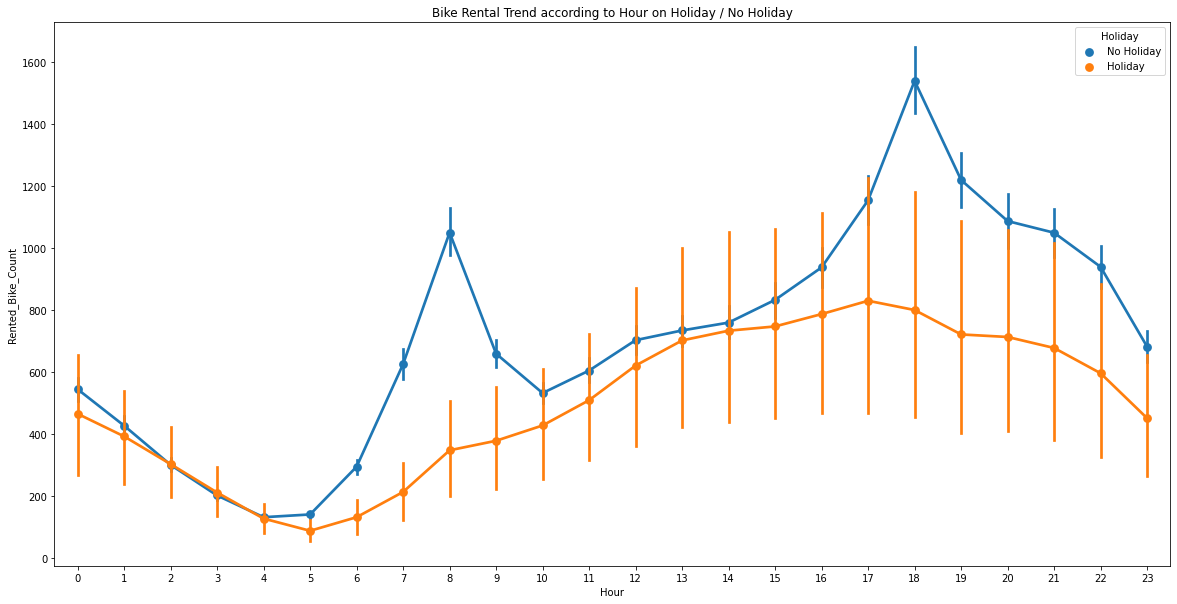

In [ ]:
# Bike Rental trend with respect to Hour on Holiday or No Holiday.
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_df['Hour'],y=bike_df['Rented_Bike_Count'],hue=bike_df['Holiday'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")

## MONTH

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

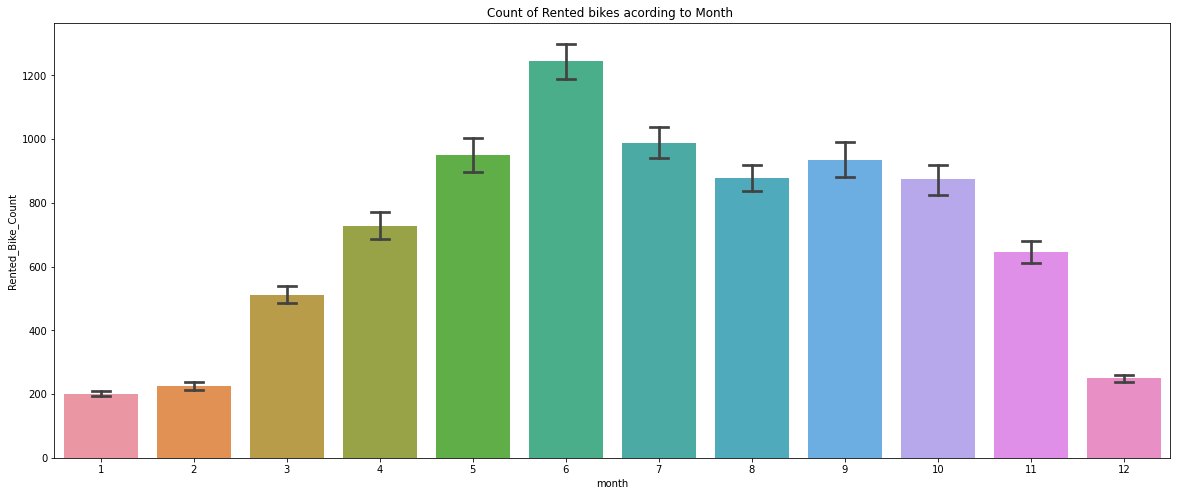

In [ ]:
# Bar plot of bike count per hour
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

Text(0.5, 1.0, 'Bike Rental Trend according to Hour in different months')

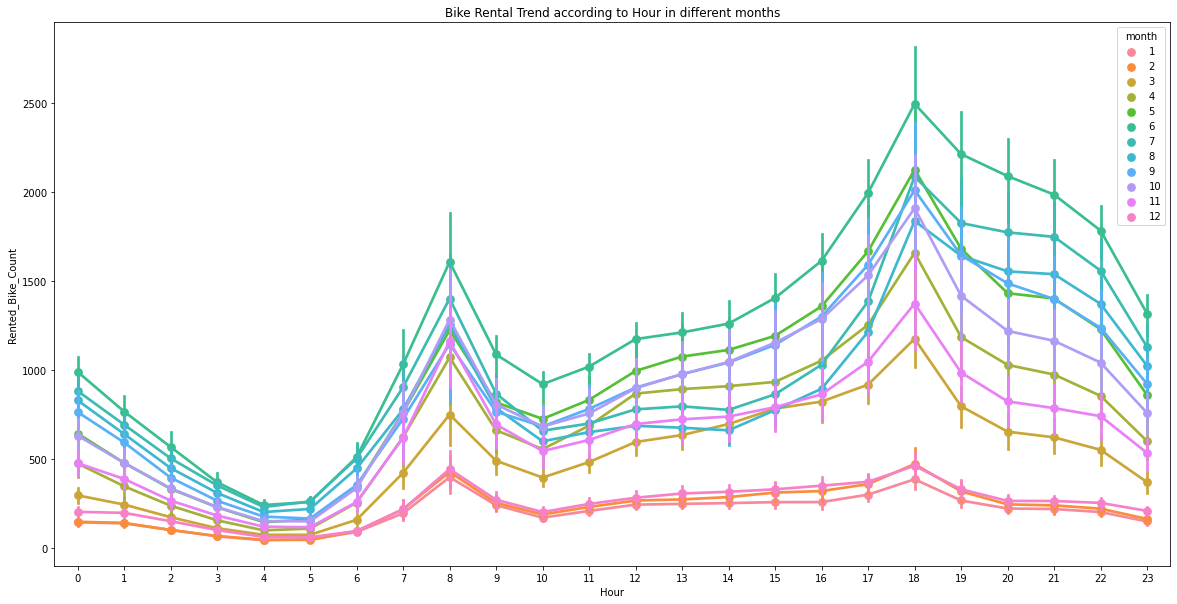

In [ ]:
## Bike Rent Count trend with respect Hours on Months
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_df['Hour'],y=bike_df['Rented_Bike_Count'],hue=bike_df['month'])
plt.title("Bike Rental Trend according to Hour in different months")

## weekdays_weekend

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays and weekend ')]

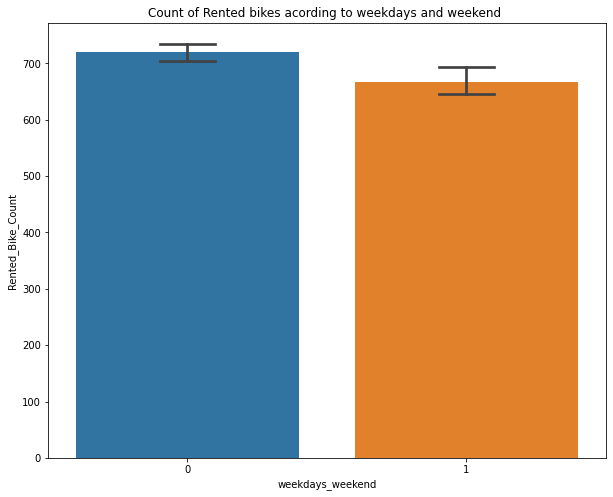

In [ ]:
# Bike Rental trend with respect to Weekdays or weekends.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays and weekend ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

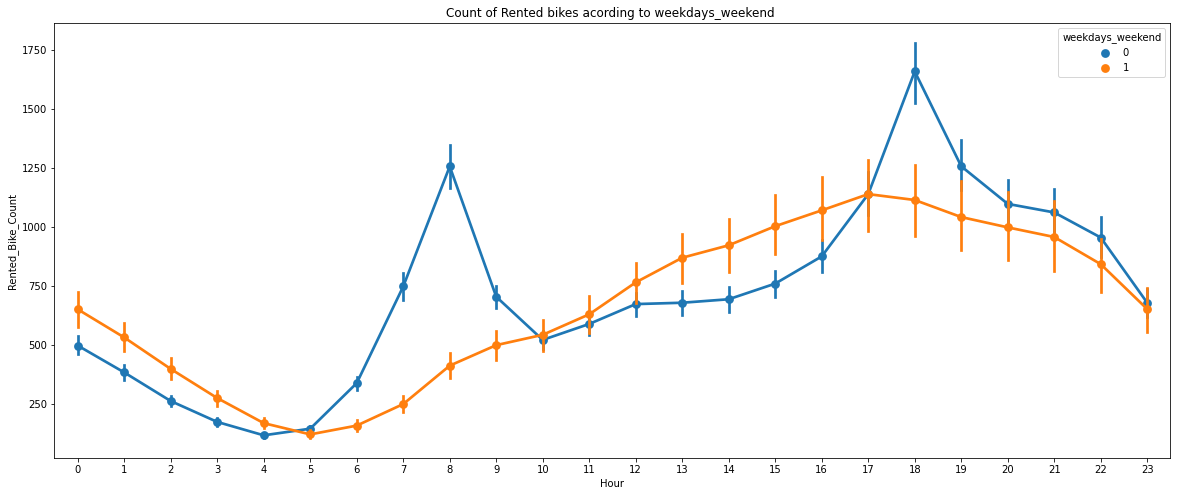

In [ ]:
# Bike Rental trend with respect to Hours on Weekdays or weekends.
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

# ***Let's check distribution of target variable- "Bike Rented Count***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


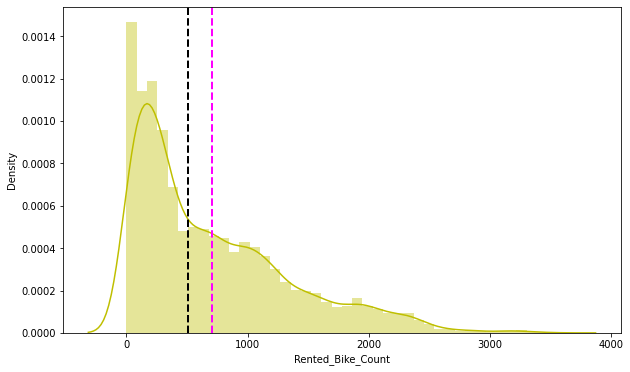

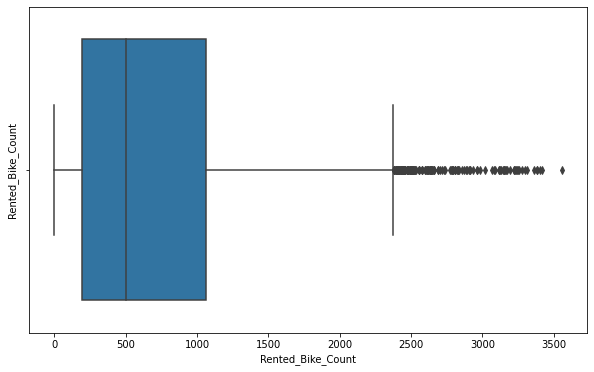

In [ ]:
# plotting subplots
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(bike_df['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(bike_df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
#box plot to check oultier
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=bike_df['Rented_Bike_Count'])
plt.show()


graph shows that Rented Bike Count has moderate right skewness and also boxplot shows that we have detect outliers in Rented Bike Count column. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


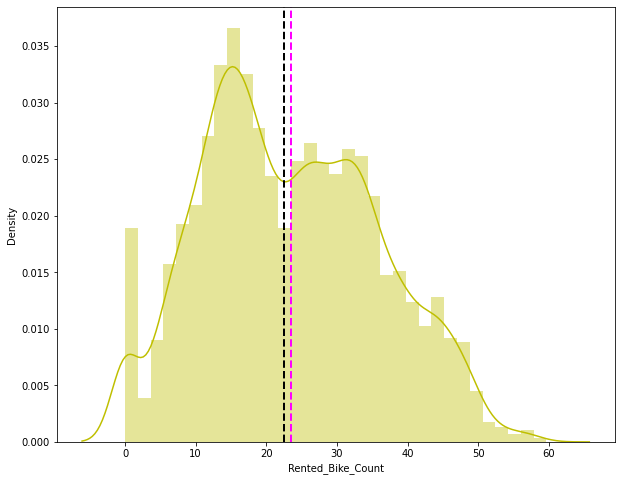

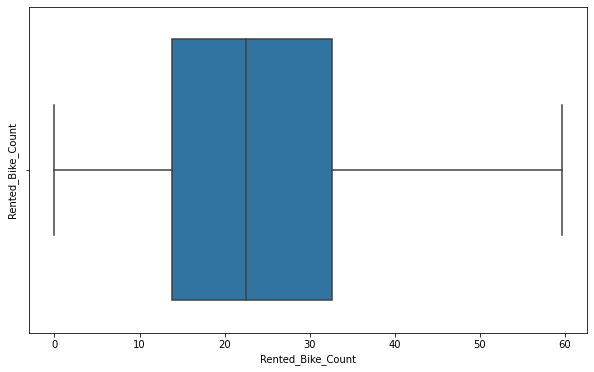

In [ ]:
# Normalizing  our target variable by squre root method
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(bike_df['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

#box plot to check oultier
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(bike_df['Rented_Bike_Count']))
plt.show()


so applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.

# ***Let's check distribution of independent variables***

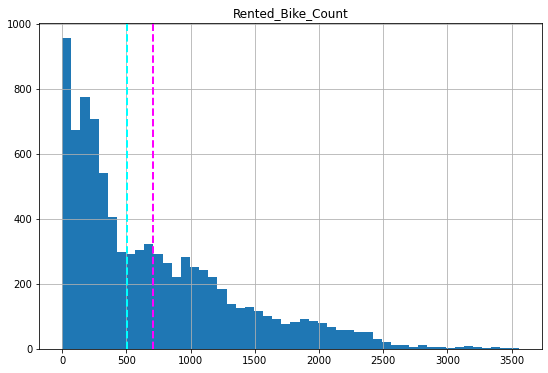

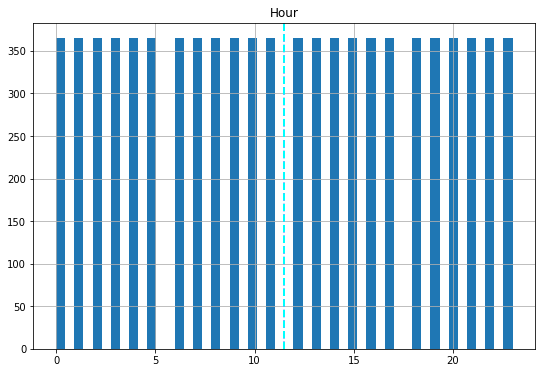

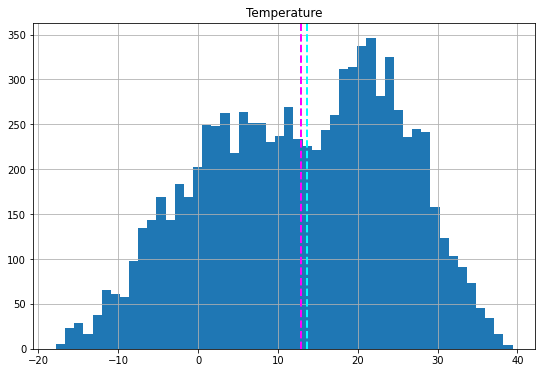

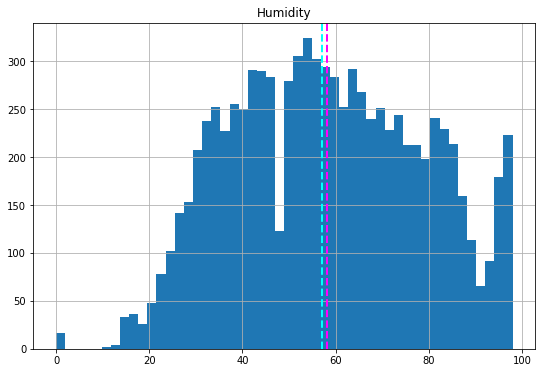

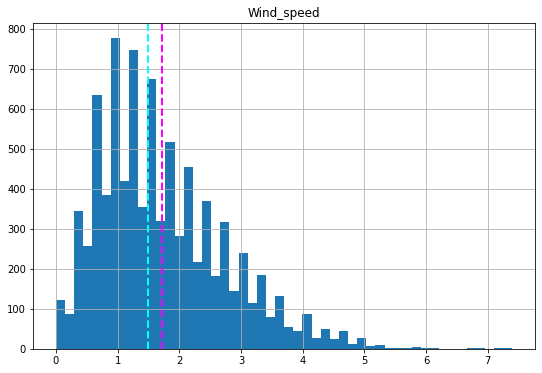

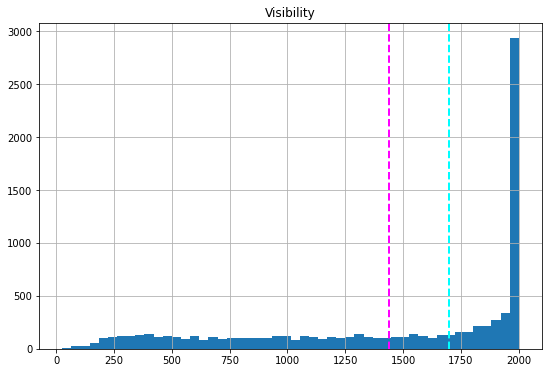

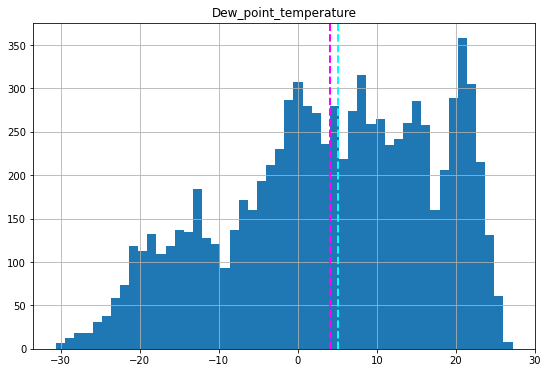

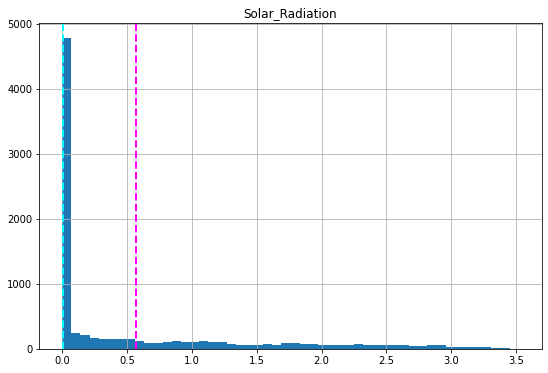

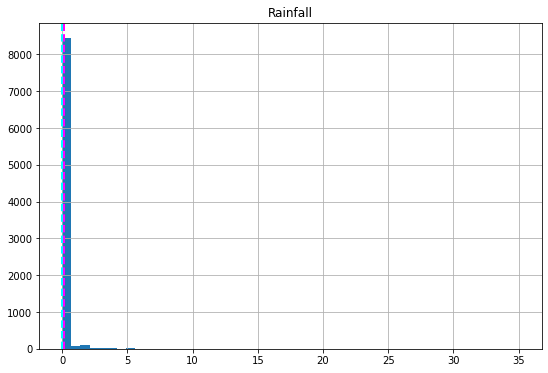

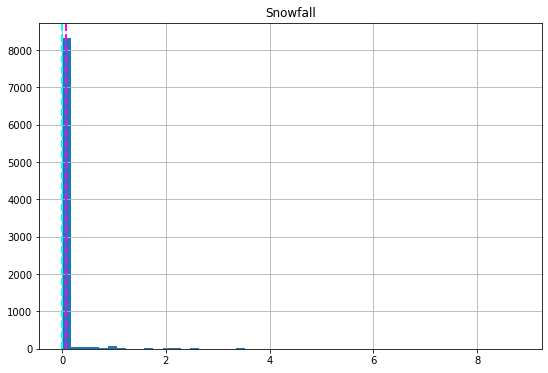

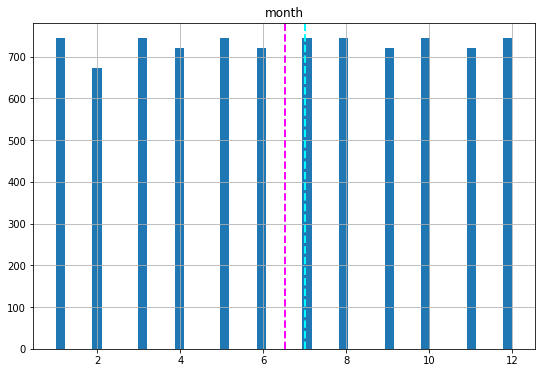

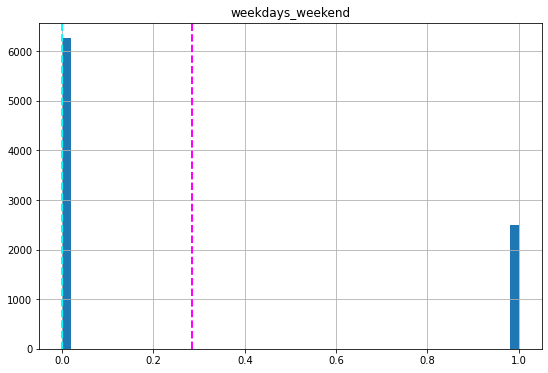

In [ ]:
# Plot  a histogram graph to check where mean and medians are lying in the distribution and the data points in variables are distributed.

for col in numeric_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


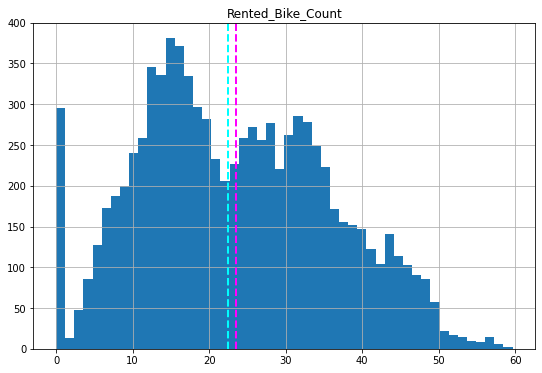

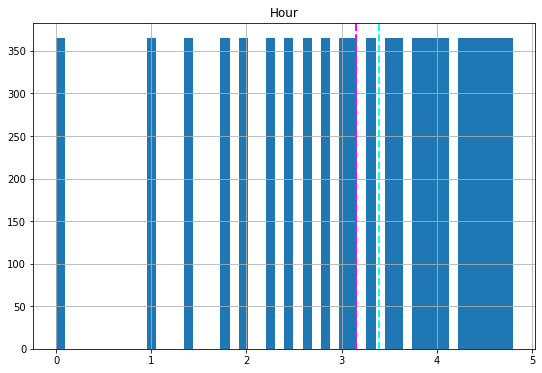

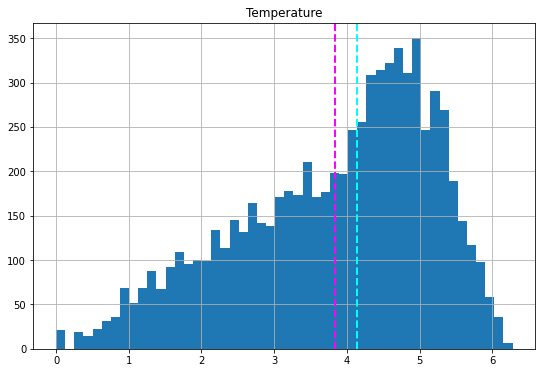

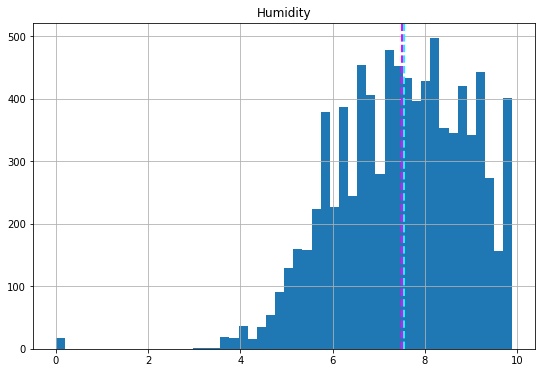

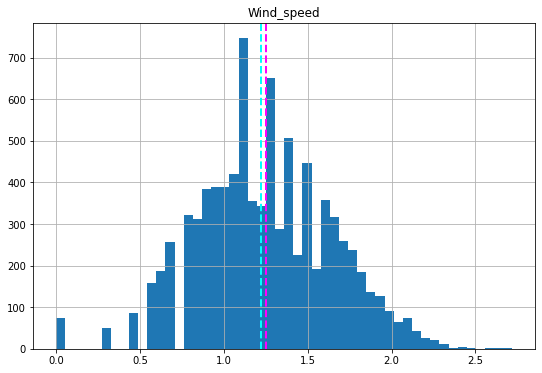

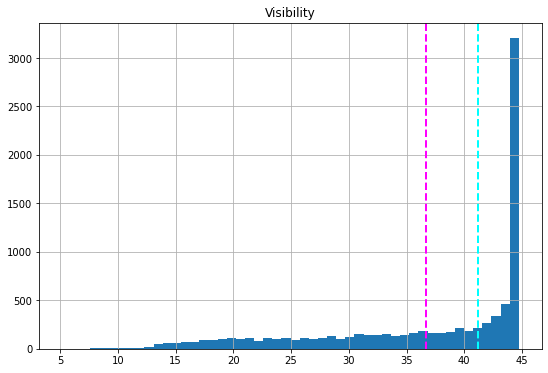

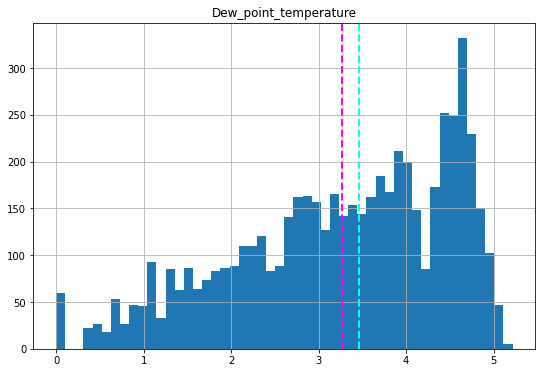

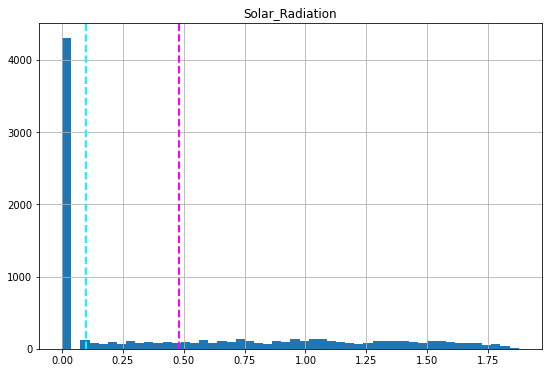

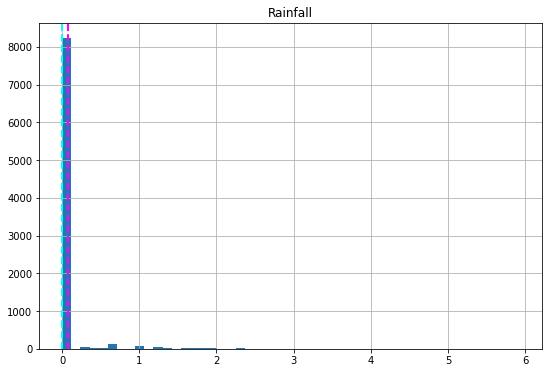

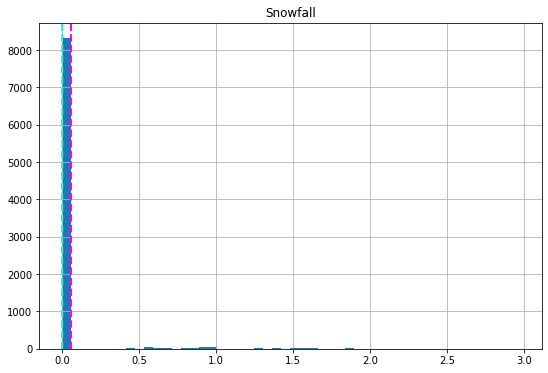

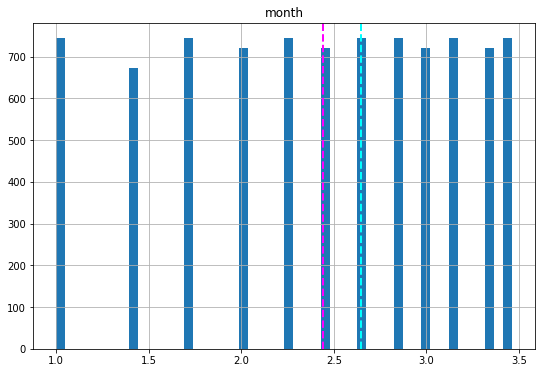

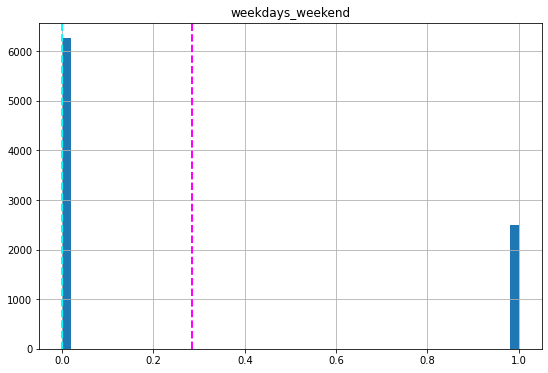

In [ ]:
# Normalizing The variables using squre root method.
for col in numeric_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(bike_df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

# **Lets check the relationship between the dependent variable-"Rented Bike Count'and remaining columns(independent variable).**

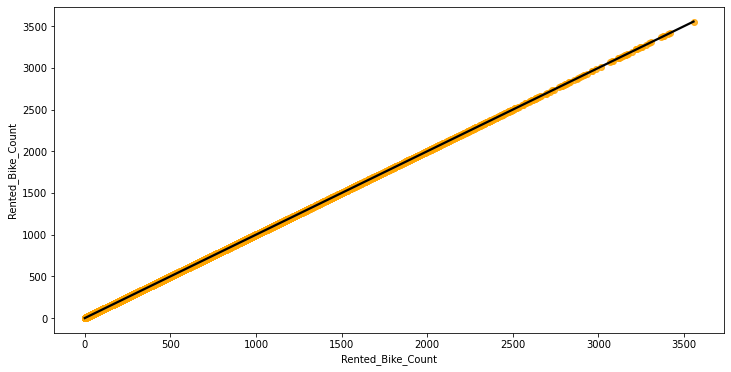

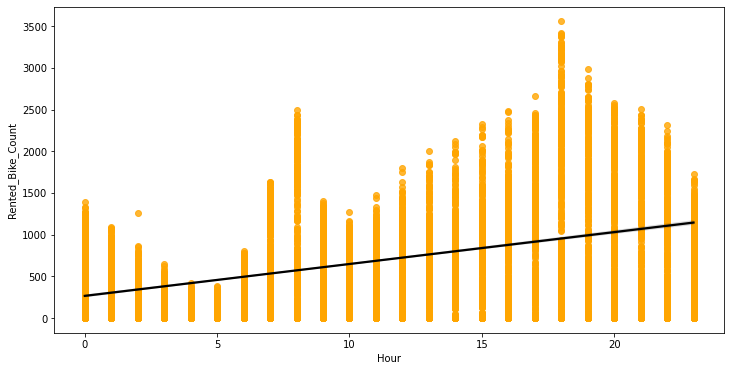

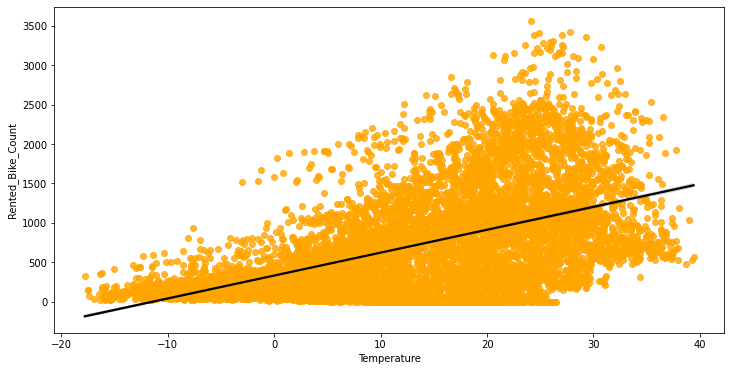

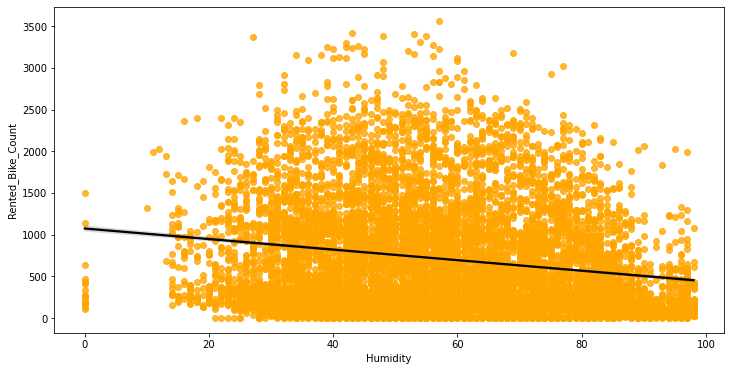

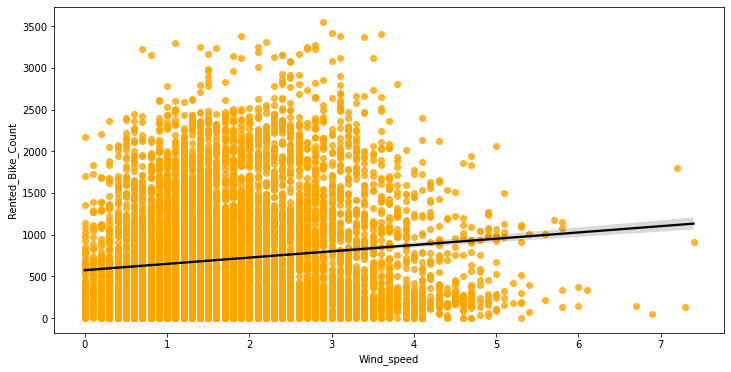

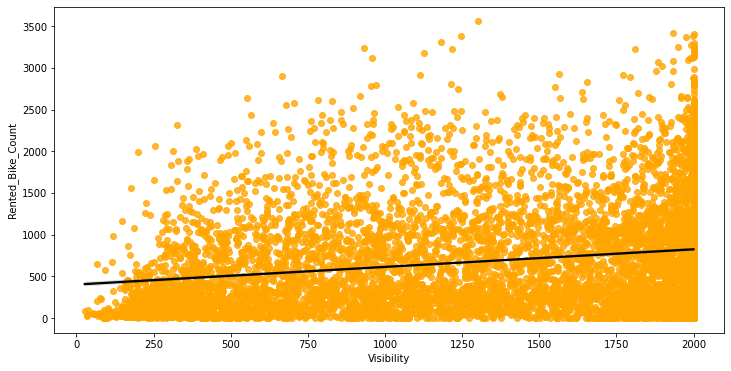

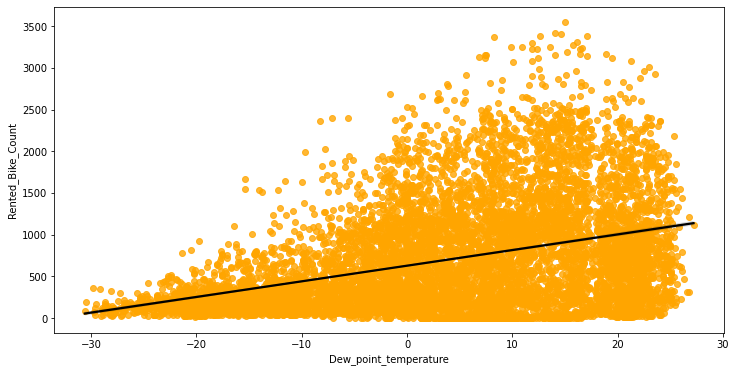

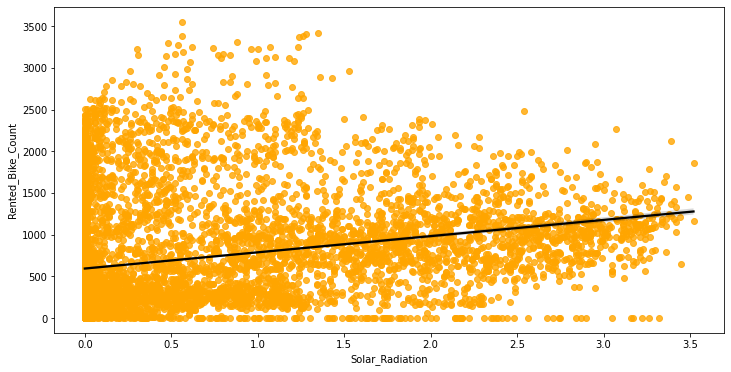

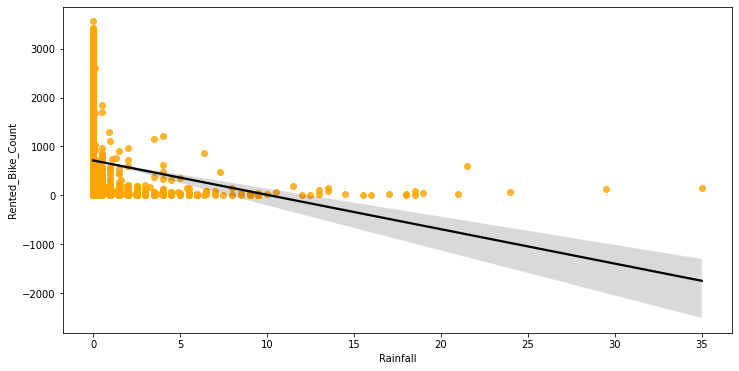

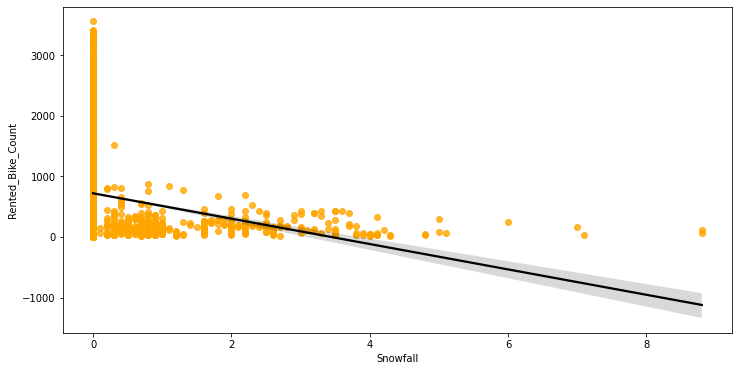

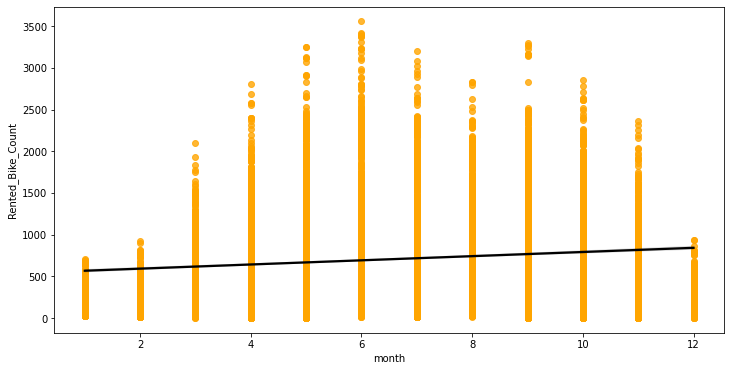

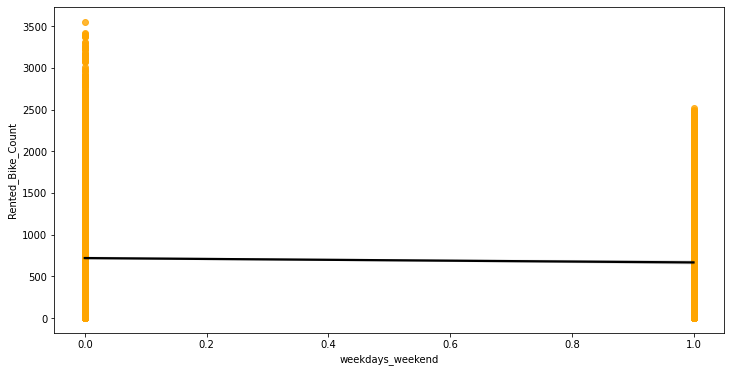

In [ ]:
for col in numeric_col:
  plt.figure(figsize=(12,6))
  ax=fig.gca()
  sns.regplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'],scatter_kws={'color':'orange'},line_kws={'color':'black'})

# **Checking Corelation between dependent and independent variable.**

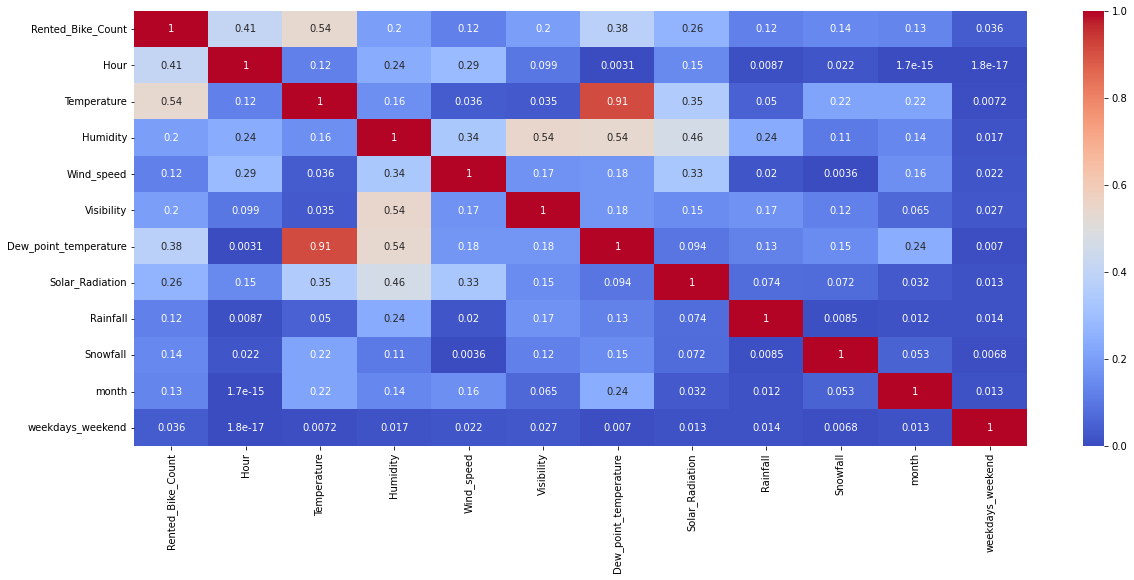

In [ ]:
plt.figure(figsize=(20,8))
corr=bike_df.corr()
sns.heatmap(data=abs(corr),annot=True,cmap='coolwarm')

Temperature and Dew point Temperature are highly correlated.


As per our regression assumption, there should not be colinearity between independent variables.
We can see from the heatmap that "Temperature" and "Dew Point Temperature" are highly corelated. We can drop one of them.As the corelation between temperature and our dependent variable "Bike Rented Count" is high. So we will Keep the Temperature column and drop the "Dew Point Temperature" column

In [ ]:
bike_df=bike_df.drop(['Dew_point_temperature'],axis=1)

## MODEL TRAINING

In [ ]:
#assign the numerical coulmn to variable
numerical_columns=list(bike_df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'month',
       'weekdays_weekend'],
      dtype='object')

In [ ]:
# make copy of dataset

bike_copy=bike_df.copy()

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
Calculate_vif(bike_copy[[i for i in bike_copy.describe().columns if i not in ['Rented_Bike_Count']]])

,variables,VIF
0,Hour,3.960112
1,Temperature,3.288623
2,Humidity,6.155420
3,Wind_speed,4.651787
4,Visibility,5.359009
5,Solar_Radiation,2.260940
6,Rainfall,1.080309
7,Snowfall,1.131108
8,month,5.009301
9,weekdays_weekend,1.380635


humidity vif is greater than 5 so we will remove that column.

In [ ]:
Calculate_vif(bike_copy[[i for i in bike_copy.describe().columns if i not in ['Rented_Bike_Count','Humidity']]])

,variables,VIF
0,Hour,3.929274
1,Temperature,2.794584
2,Wind_speed,4.281113
3,Visibility,5.280633
4,Solar_Radiation,1.912107
5,Rainfall,1.046907
6,Snowfall,1.094804
7,month,4.082794
8,weekdays_weekend,1.353591


visbility is greater than 5 so we will remove that column

In [ ]:
Calculate_vif(bike_copy[[i for i in bike_copy.describe().columns if i not in ['Rented_Bike_Count','Humidity','Visibility']]])

,variables,VIF
0,Hour,3.746083
1,Temperature,2.782149
2,Wind_speed,3.650982
3,Solar_Radiation,1.909706
4,Rainfall,1.030493
5,Snowfall,1.088816
6,month,3.300066
7,weekdays_weekend,1.345299


Now we have VIF values in the range of 1 to 5. we will drop 'Humidity','Visibility' this columns from our dataset

In [ ]:
# As per above vif calculation dropping humidity and visibility columns.
bike_copy.drop(['Humidity','Visibility'],inplace=True,axis=1)

In [ ]:
# information of dataset
bike_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented_Bike_Count  8760 non-null   int64  
 1   Hour               8760 non-null   int64  
 2   Temperature        8760 non-null   float64
 3   Wind_speed         8760 non-null   float64
 4   Solar_Radiation    8760 non-null   float64
 5   Rainfall           8760 non-null   float64
 6   Snowfall           8760 non-null   float64
 7   Seasons            8760 non-null   object 
 8   Holiday            8760 non-null   object 
 9   Functioning_Day    8760 non-null   object 
 10  month              8760 non-null   int64  
 11  weekdays_weekend   8760 non-null   int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 821.4+ KB


As "Hour","month","weekdays_weekend" column are show as a integer data type but actually it is a category data type. 
so we need to change this data type if we not then, while doing the further anlysis and correleted with this then the values are not actually true so we can mislead by this. 

In [ ]:
#Change the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  bike_copy[col]=bike_copy[col].astype('category')

In [ ]:
bike_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Wind_speed         8760 non-null   float64 
 4   Solar_Radiation    8760 non-null   float64 
 5   Rainfall           8760 non-null   float64 
 6   Snowfall           8760 non-null   float64 
 7   Seasons            8760 non-null   object  
 8   Holiday            8760 non-null   object  
 9   Functioning_Day    8760 non-null   object  
 10  month              8760 non-null   category
 11  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(1), object(3)
memory usage: 643.0+ KB


**# Create the dummy variables**

In [ ]:
# all categorical values in dataset
categorical_features=list(bike_copy.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

one hot coding-representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical

In [ ]:
def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    bike_copy = one_hot_encoding(bike_copy, col)
bike_copy.head() 

,Rented_Bike_Count,Temperature,Wind_speed,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,Hour_4,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,2.2,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,0.8,0.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,1.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,0.9,0.0,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,2.3,0.0,0.0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#information of dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented_Bike_Count  8760 non-null   int64  
 1   Hour               8760 non-null   int64  
 2   Temperature        8760 non-null   float64
 3   Humidity           8760 non-null   int64  
 4   Wind_speed         8760 non-null   float64
 5   Visibility         8760 non-null   int64  
 6   Solar_Radiation    8760 non-null   float64
 7   Rainfall           8760 non-null   float64
 8   Snowfall           8760 non-null   float64
 9   Seasons            8760 non-null   object 
 10  Holiday            8760 non-null   object 
 11  Functioning_Day    8760 non-null   object 
 12  month              8760 non-null   int64  
 13  weekdays_weekend   8760 non-null   int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 958.2+ KB


# **Linear Regression**

In [ ]:
#Assign the value in X and Y
X = bike_copy.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(bike_copy['Rented_Bike_Count'])

In [ ]:
# all dependent values
X.head()

,Temperature,Wind_speed,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,2.2,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-5.5,0.8,0.0,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-6.0,1.0,0.0,0.0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-6.2,0.9,0.0,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-6.0,2.3,0.0,0.0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# independent values
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [ ]:
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)


In [ ]:
# Transforming data 
# Here if you don't apply scaling still we will get almost similar results.
# for its a good practice to apply scaling to the linear regression models.
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [ ]:
# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7008, 45)
(7008,)
(1752, 45)
(1752,)


In [ ]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [ ]:
#Checking score
reg.score(X_train, y_train)

0.7440043206814007

In [ ]:
#check the coefficeint
reg.coef_

array([ 2.23748740e+01,  9.03523620e-01,  1.06921043e+01, -6.88667286e+01,
       -9.95657046e+00, -2.24384547e+00, -5.39800804e+00, -7.84212006e+00,
       -1.02269641e+01, -1.00755623e+01, -5.29026060e+00,  1.07768812e+00,
        6.34023346e+00,  5.31373140e-02, -4.59389806e+00, -4.92491711e+00,
       -4.10461027e+00, -3.93653279e+00, -3.74430540e+00, -2.04712864e+00,
        4.44306144e-01,  4.73742819e+00,  1.16474543e+01,  8.03114414e+00,
        7.09533484e+00,  7.00634345e+00,  5.38380485e+00,  1.61748662e+00,
       -3.90249976e+12, -5.73322638e+12, -6.32519257e+12,  3.18204505e+00,
        2.83500569e+01, -8.09317975e-01, -2.42269281e+12, -2.42269281e+12,
       -2.42269281e+12, -5.91966188e+11, -5.91966188e+11, -5.91966188e+11,
       -6.32519257e+12, -6.32519257e+12, -6.32519257e+12,  1.38216939e+00,
       -1.43887249e+00])

In [ ]:
# Check intercept
reg.intercept_

6325192572834.371

In [ ]:
# Y peredictions on train data
y_pred_train=reg.predict(X_train)
# y predictions on test data
y_pred_test=reg.predict(X_test)

In [ ]:
#pred train value
y_pred_train

array([19.47558594, 41.53515625, 25.38964844, ..., 37.4609375 ,
       22.22851562, 25.56933594])

In [ ]:
# pred test value
y_pred_test

array([15.72558594, 23.16308594, 21.59472656, ..., 22.71875   ,
       33.87207031, 27.68066406])

In [ ]:
#residuals
residuals_train=y_train - y_pred_train
residuals_test=y_test - y_pred_test

In [ ]:
round((np.mean(residuals_train)))

0

A residual is a measure of how well a line fits an individual data point. This vertical distance is known as a residual. For data points above the line, the residual is positive, and for data points below the line, the residual is negative. The closer a data point's residual is to 0, the better the fit.

FIRST WE CALCULATE FOR TRAINING DATA.

In [ ]:
# Evaluation of training data set

#Calculate  Mean Squared Error
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE)

#Calculate R2 Score
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)

#Calculate Ajusted R2 Score
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 39.508612575097864
RMSE : 6.285587687328677
MAE : 4.668083717183426
R2 : 0.7440043206814007
Adjusted R2 : 0.7372517969010155


In [ ]:
#STORE THE DATA FOR FUTHER USE
dict1={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

THEN WE CALCULATE FOR TEST DATA.

In [ ]:
# Evaluation of test data set

#Calculate  Mean Squared Error
MSE  = mean_squared_error((y_test),(y_pred_test))
print("MSE :" , MSE)

#Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

#Calculate Mean Absolute Error
MAE= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE)

#Calculate R2 Score
r2= r2_score((y_test), (y_pred_test))
print("R2 :",r2)

#Calculate Ajusted R2 Score
Adjusted_R2 = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2 )

MSE : 38.3548473568483
RMSE : 6.193129044097846
MAE : 4.666966790839716
R2 : 0.756455908951886
Adjusted R2 : 0.7500318268316251


In [ ]:
#STORING THE TEST DATA
dict2={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2),2)
       }
test_df=pd.DataFrame(dict2,index=[1])


The r2_score for the test set is 0.78. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter)

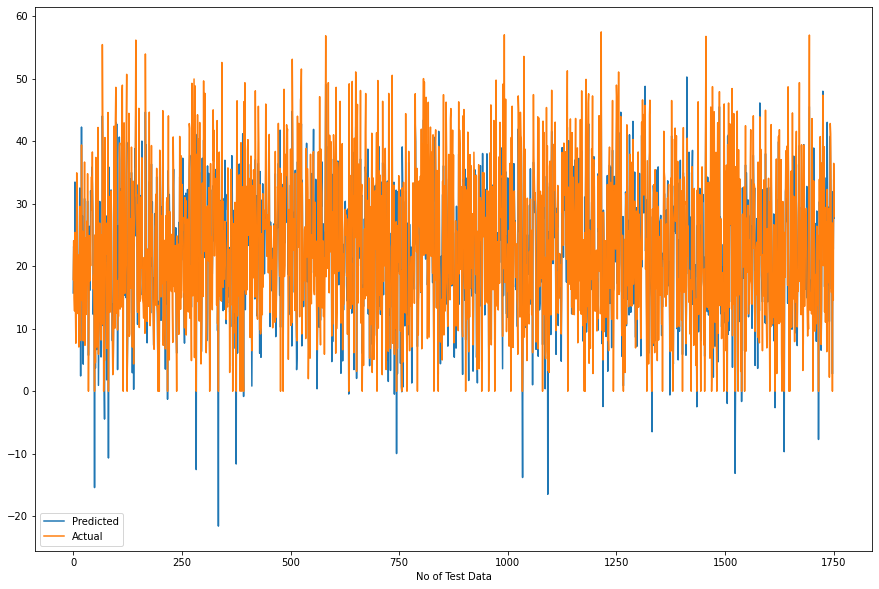

In [ ]:
#plot between predicted y values and actual y values
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test))
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

Text(0.5, 1.0, 'Actual v/s Predicted')

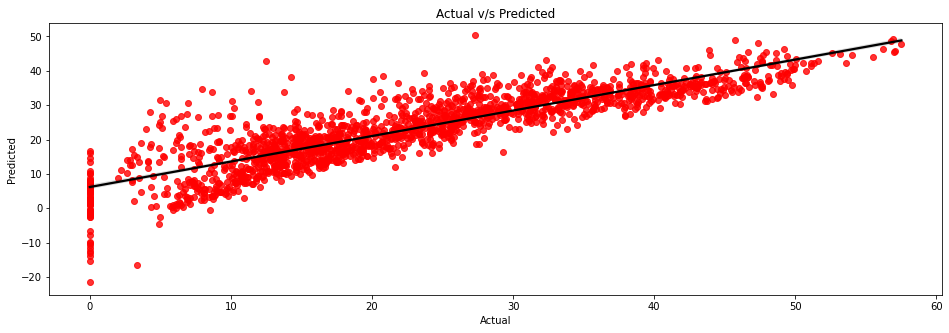

In [ ]:
 #plot scatter plot for y_test and y_actual and also Checking how predicted values and actual values are close  to the regression line
plt.figure(figsize=(16,5))
sns.regplot(x=y_test,y=y_pred_test,scatter_kws={'color':'red'},line_kws={'color':'black'})
plt.xlabel('Actual')
plt.ylabel("Predicted")
plt.title("Actual v/s Predicted")

Text(0.5, 0, 'y_predicted')

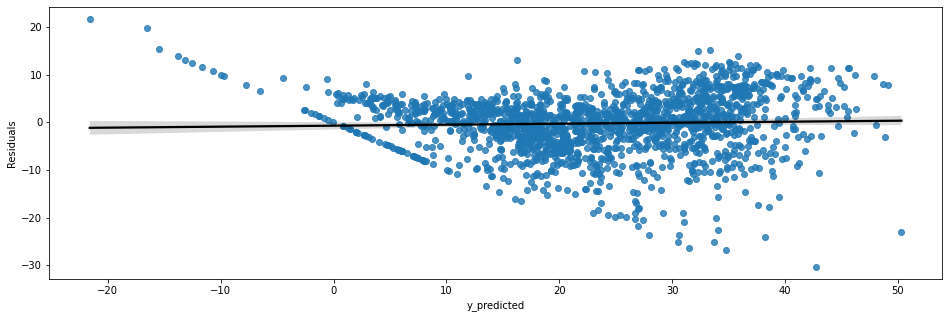

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred_test,y=y_test-y_pred_test,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual Distribution')

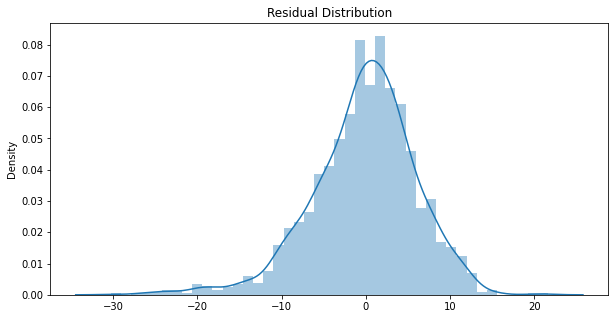

In [ ]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed).
 #Mean of residuals should be zero or close to 0 as much as possible. It is done to check whether our line is actually the line of “best fit”
plt.figure(figsize=(10,5))
sns.distplot(x=y_test-y_pred_test)
plt.title("Residual Distribution")

# **LASSO REGRESSION**

In [ ]:
# Fitting and training the model
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
# Fit the Lasso model
las=lasso.fit(X_train, y_train)

In [ ]:
# Check score on test dataset
las.score(X_test, y_test)

0.7535699371666892

In [ ]:
# Check score on train dataset
las.score(X_train, y_train)

0.7423568867185546

In [ ]:
# Check coefficient
las.coef_

array([ 21.29107385,   0.35823924,   9.72809578, -60.14731615,
        -5.79118228,  -1.77156721,  -4.96260698,  -7.40572929,
        -9.79618281,  -9.62234853,  -4.87508093,   1.06859738,
         6.37321444,   0.20573707,  -3.74870734,  -3.93125347,
        -3.01776207,  -2.82159128,  -2.5880668 ,  -0.94992939,
         0.9891006 ,   5.13660401,  11.83557216,   8.20271472,
         7.1272838 ,   7.03771336,   5.43121692,   1.63782065,
        -0.        ,  -0.        ,  -5.00817372,   2.85901586,
        27.84783091,  -0.63598467,  -3.18980796,  -1.1074333 ,
         0.62785651,   3.17421846,  -2.21406695,  -3.6503632 ,
         1.35538147,   3.2674453 ,   1.99776486,   1.0597582 ,
        -1.35975629])

In [ ]:
# Check intercept
las.intercept_

-17.33736459441289

In [ ]:
# y prdiction on train data
y_pred_train_las=lasso.predict(X_train)

# y prdiction on test data
y_pred_test_las=lasso.predict(X_test)

In [ ]:
# predicted train values
y_pred_train_las

array([19.87082002, 41.21910752, 25.91640163, ..., 37.16363408,
       22.09570835, 25.39150591])

In [ ]:
# predicted test values
y_pred_test_las

array([15.92168029, 23.17941227, 21.20524655, ..., 22.61628996,
       33.37393337, 27.18728741])

FIRST WE CALCULATE FOR TRAINING DATA.

In [ ]:
# Evaluation of train data set

#Calculate  Mean Squared Error
MSE= mean_squared_error((y_train), (y_pred_train_las))
print("MSE :",MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

#Calculate Mean Absolute Error
MAE= mean_absolute_error(y_train, y_pred_train_las)
print("MAE :",MAE)

#Calculate R2 Score
r2= r2_score(y_train, y_pred_train_las)
print("R2 :",r2)

#Calculate Ajusted R2 Score
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train_las))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_las))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 39.762866202949674
RMSE : 6.305780380171012
MAE : 4.674323095118228
R2 : 0.7423568867185546
Adjusted R2 : 0.7355609077632996


In [ ]:
#STORING THE TRAIN DATA
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

**THEN WE CALCULATE FOR TEST DATA.**

In [ ]:
# Evaluation of Test data set

#Calculate  Mean Squared Error
MSE= mean_squared_error((y_test), (y_pred_test_las))
print("MSE :",MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

#Calculate  Mean Absolute Error
MAE= mean_absolute_error(y_test, y_pred_test_las)
print("MAE :",MAE)

#Calculate R2 Score
r2= r2_score(y_test, y_pred_test_las)
print("R2 :",r2)

#Calculate Adjusted R2 Score
Adjusted_R2=(1-(1-r2_score((y_test), (y_pred_test_las)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_las)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 38.80934825161862
RMSE : 6.229714941441432
MAE : 4.677412408477859
R2 : 0.7535699371666892
Adjusted R2 : 0.7470697303510392


In [ ]:
#STORING THE TEST DATA
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

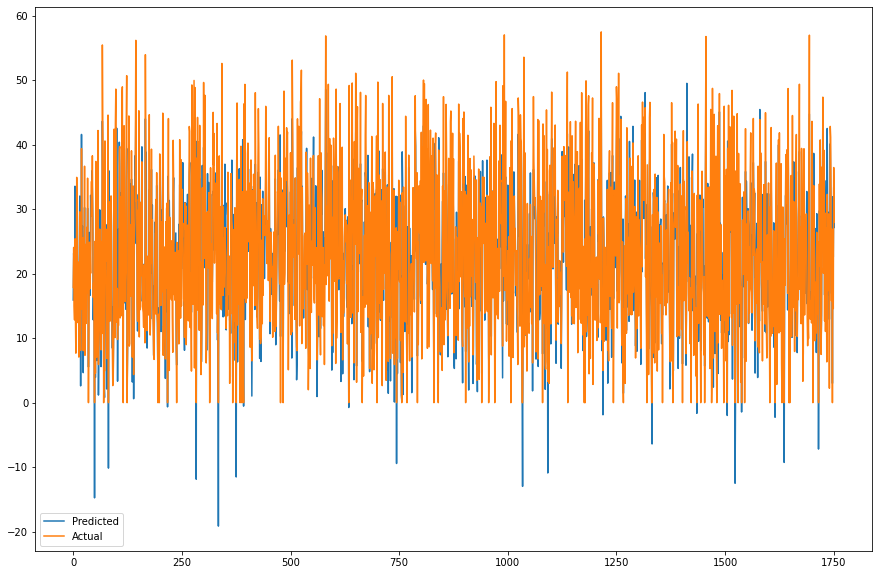

In [ ]:
#plot between predicted y values and actual y values
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_las))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 1.0, 'Actual v/s Predicted')

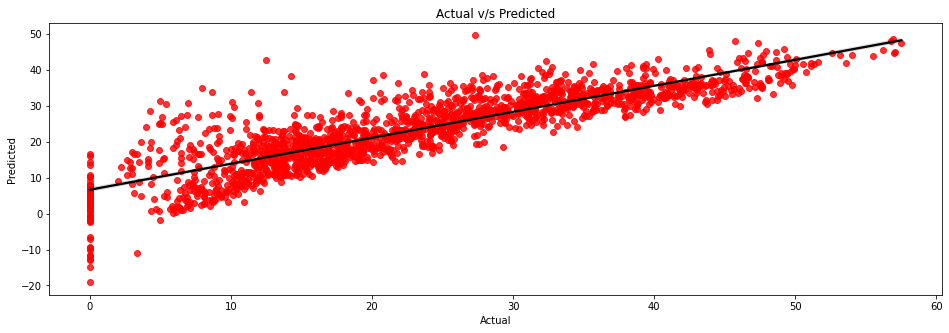

In [ ]:
 #plot scatter plot for y_test and y_actual and also Checking how predicted values and actual values are close  to the regression line
plt.figure(figsize=(16,5))
sns.regplot(x=y_test,y=y_pred_test_las,scatter_kws={'color':'red'},line_kws={'color':'black'})
plt.xlabel('Actual')
plt.ylabel("Predicted")
plt.title("Actual v/s Predicted")

Text(0.5, 0, 'y_predicted')

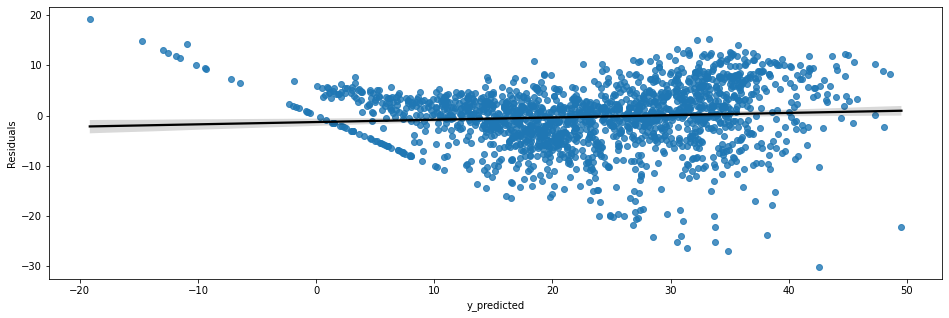

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred_test_las,y=y_test-y_pred_test_las,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual Distribution')

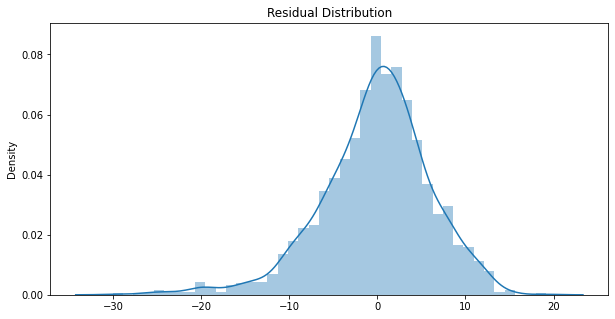

In [ ]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed).
 #Mean of residuals should be zero or close to 0 as much as possible. It is done to check whether our line is actually the line of “best fit”
plt.figure(figsize=(10,5))
sns.distplot(x=y_test-y_pred_test_las)
plt.title("Residual Distribution")

# **RIDGE REGRESSION**

In [ ]:
# instantiating
from sklearn.linear_model import Ridge
ridge= Ridge(alpha=0.1)

In [ ]:
# Fit the ridge model
rid=ridge.fit(X_train, y_train)
rid

Ridge(alpha=0.1)

In [ ]:
# Check score on train dataset
rid.score(X_train, y_train)

0.74399867066264

In [ ]:
# check coefficient
rid.coef_

array([ 2.23422812e+01,  9.06836363e-01,  1.07214831e+01, -6.79254769e+01,
       -9.90350103e+00, -2.23789159e+00, -5.38986812e+00, -7.83600535e+00,
       -1.02229232e+01, -1.00657322e+01, -5.28397241e+00,  1.08234999e+00,
        6.33974070e+00,  4.64331400e-02, -4.59820181e+00, -4.93200950e+00,
       -4.11231164e+00, -3.94946007e+00, -3.74828651e+00, -2.05151175e+00,
        4.45668249e-01,  4.73590510e+00,  1.16417541e+01,  8.03712390e+00,
        7.09431084e+00,  7.00840252e+00,  5.38803528e+00,  1.62389449e+00,
       -1.06476856e+00, -1.01113306e+00, -4.78069678e+00,  3.17906022e+00,
        2.83350126e+01, -8.10697250e-01, -2.32739073e+00, -3.36324701e-01,
        1.59894687e+00,  3.92647479e+00, -1.75086902e+00, -3.18673883e+00,
        1.25691890e+00,  3.33880015e+00,  2.26087935e+00,  1.37980862e+00,
       -1.43646534e+00])

In [ ]:
# Check intercept
rid.intercept_

-18.363832039227738

In [ ]:
# y predictions on training dataset
y_pred_train_rid=rid.predict(X_train)

# y predictions on test dataset
y_pred_test_rid=rid.predict(X_test)

In [ ]:
# predicted train values
y_pred_train_rid

array([19.47019885, 41.52406016, 25.3792021 , ..., 37.46481177,
       22.21898934, 25.5632833 ])

In [ ]:
# predicted test values
y_pred_test_rid

array([15.72283398, 23.15906539, 21.59041943, ..., 22.70787805,
       33.86303338, 27.66792225])

FIRST WE CALCULATE FOR TRAINING DATA.

In [ ]:
# Evaluation of Train data set

#Calculate  Mean Squared Error
MSE= mean_squared_error((y_train), (y_pred_train_rid))
print("MSE :",MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

#Calculate  Mean Absolute Error
MAE= mean_absolute_error(y_train, y_pred_train_rid)
print("MAE :",MAE)

#Calculate R2 Score
r2= r2_score(y_train, y_pred_train_rid)
print("R2 :",r2)

#Calculate Adjusted R2 Score
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train_rid))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_rid))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 39.50948456013626
RMSE : 6.285657050789222
MAE : 4.669438421067349
R2 : 0.74399867066264
Adjusted R2 : 0.7372459978489347


In [ ]:
#STORING THE TRAIN DATA
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

**THEN WE CALCULATE FOR TEST DATA.**

In [ ]:
# Evaluation of Test data set

#Calculate  Mean Squared Error
MSE= mean_squared_error((y_test), (y_pred_test_rid))
print("MSE :",MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

#Calculate  Mean Absolute Error
MAE= mean_absolute_error(y_test, y_pred_test_rid)
print("MAE :",MAE)

#Calculate R2 Score
r2= r2_score(y_test, y_pred_test_rid)
print("R2 :",r2)

#Calculate Adjusted R2 Score
Adjusted_R2=(1-(1-r2_score((y_test), (y_pred_test_rid)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_rid)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 38.3785255680795
RMSE : 6.195040400843202
MAE : 4.668500200981983
R2 : 0.7563055579837725
Adjusted R2 : 0.7498775099821722


In [ ]:
#STORING THE TEST DATA
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

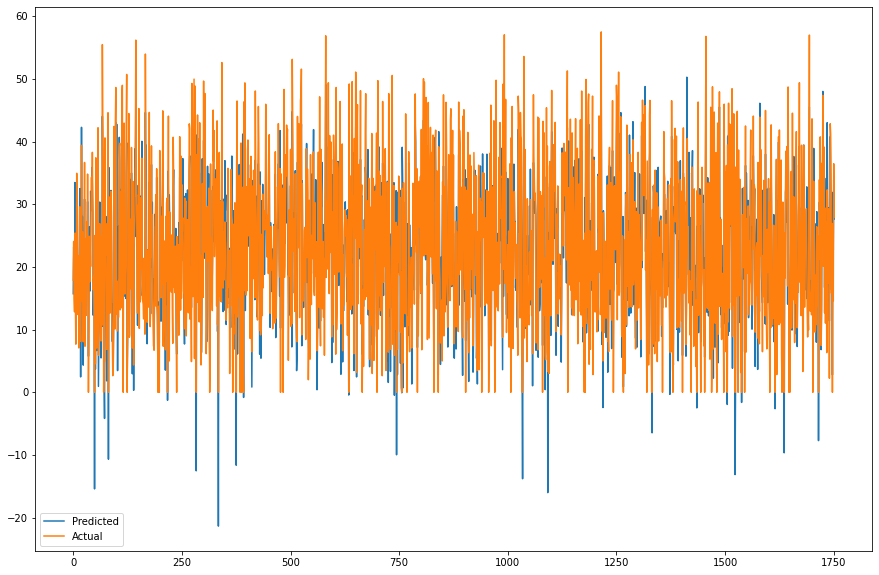

In [ ]:
#plot between predicted y values and actual y values
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_rid))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 1.0, 'Actual v/s Predicted')

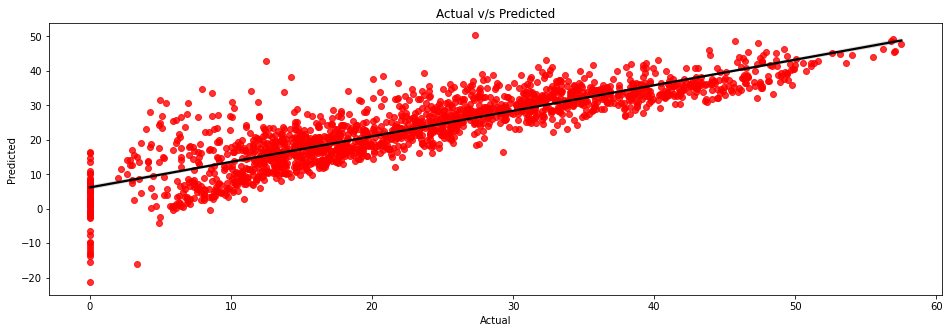

In [ ]:
 #plot scatter plot for y_test and y_actual and also Checking how predicted values and actual values are close  to the regression line
plt.figure(figsize=(16,5))
sns.regplot(x=y_test,y=y_pred_test_rid,scatter_kws={'color':'red'},line_kws={'color':'black'})
plt.xlabel('Actual')
plt.ylabel("Predicted")
plt.title("Actual v/s Predicted")

Text(0.5, 0, 'y_predicted')

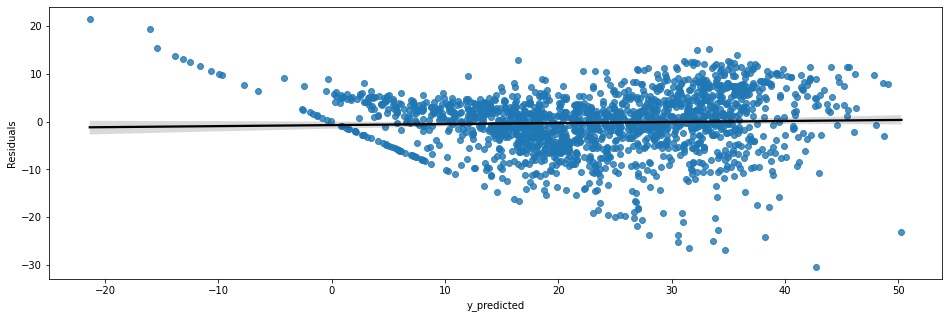

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred_test_rid,y=y_test-y_pred_test_rid,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual Distribution')

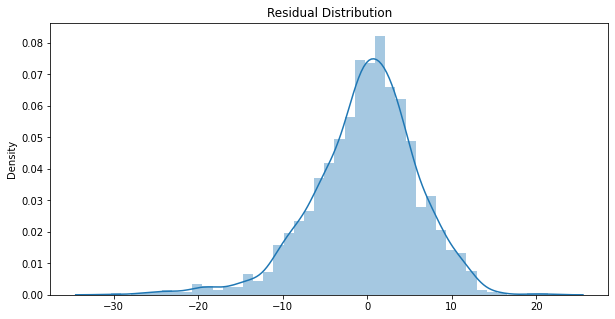

In [ ]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed).
 #Mean of residuals should be zero or close to 0 as much as possible. It is done to check whether our line is actually the line of “best fit”
plt.figure(figsize=(10,5))
sns.distplot(x=y_test-y_pred_test_rid)
plt.title("Residual Distribution")

# **ELASTIC NET REGRESSION**

In [ ]:
# Fitting and training the model
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
#FIT THE MODEL
ela=elasticnet.fit(X_train,y_train)

In [ ]:
#check the score
ela.score(X_train, y_train)

0.5210862500223701

In [ ]:
# check coefficient
ela.coef_

array([ 5.93896117e+00,  1.21874910e+00,  4.79019024e+00, -4.75470704e-01,
       -0.00000000e+00, -9.41461666e-01, -2.51462325e+00, -3.62648384e+00,
       -4.62087692e+00, -4.44563574e+00, -2.55187540e+00, -0.00000000e+00,
        2.10159462e+00,  0.00000000e+00, -7.68723369e-01, -4.69594664e-01,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  9.48140139e-02,
        9.02631731e-01,  2.51539186e+00,  4.87047906e+00,  3.35124642e+00,
        2.35683799e+00,  2.36158719e+00,  1.68384056e+00,  0.00000000e+00,
       -0.00000000e+00,  2.62054012e+00, -6.36782911e+00,  9.34180772e-01,
        9.36559619e+00, -9.81254929e-01, -1.58959926e+00, -0.00000000e+00,
        1.41697331e+00,  2.78244744e+00,  5.35427669e-03, -1.65383497e-01,
        1.27421775e+00,  1.36919720e+00,  0.00000000e+00, -2.82929444e-01,
       -5.68372569e-01])

In [ ]:
# Check intercept
ela.intercept_

10.07972277163991

In [ ]:
# y predictions on training dataset
y_pred_train_ela=ela.predict(X_train)

# y predictions on test dataset
y_pred_test_ela=ela.predict(X_test)

In [ ]:
# predicted train values
y_pred_train_ela

array([17.58853911, 34.04877302, 28.80250245, ..., 34.20912764,
       23.44001747, 23.71170683])

In [ ]:
# predicted test values
y_pred_test_ela

array([20.7800013 , 22.84380569, 18.65058831, ..., 23.46427555,
       26.84321621, 24.91841683])

FIRST WE CALCULATE FOR TRAINING DATA.

In [ ]:
# Evaluation of Train data set

#Calculate  Mean Squared Error
MSE= mean_squared_error((y_train), (y_pred_train_ela))
print("MSE :",MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

#Calculate  Mean Absolute Error
MAE= mean_absolute_error(y_train, y_pred_train_ela)
print("MAE :",MAE)

#Calculate R2 Score
r2= r2_score(y_train, y_pred_train_ela)
print("R2 :",r2)

#Calculate Adjusted R2 Score
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train_ela))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ela))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 73.91225451584701
RMSE : 8.597223651612595
MAE : 6.591591232628641
R2 : 0.5210862500223701
Adjusted R2 : 0.5084537067931829


In [ ]:
#STORING THE TRAIN DATA
dict1={'Model':'Elastic Net regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

THEN WE CALCULATE FOR TEST DATA.

In [ ]:
# Evaluation of Test data set

#Calculate  Mean Squared Error
MSE= mean_squared_error((y_test), (y_pred_test_ela))
print("MSE :",MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

#Calculate  Mean Absolute Error
MAE= mean_absolute_error(y_test, y_pred_test_ela)
print("MAE :",MAE)

#Calculate R2 Score
r2= r2_score(y_test, y_pred_test_ela)
print("R2 :",r2)

#Calculate Adjusted R2 Score
Adjusted_R2=(1-(1-r2_score((y_test), (y_pred_test_ela)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ela)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 78.2145230301912
RMSE : 8.843897502243635
MAE : 6.7526544751624975
R2 : 0.5033565186448712
Adjusted R2 : 0.4902563095821626


In [ ]:
#STORING THE TEST DATA
dict2={'Model':'Elastic Net regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

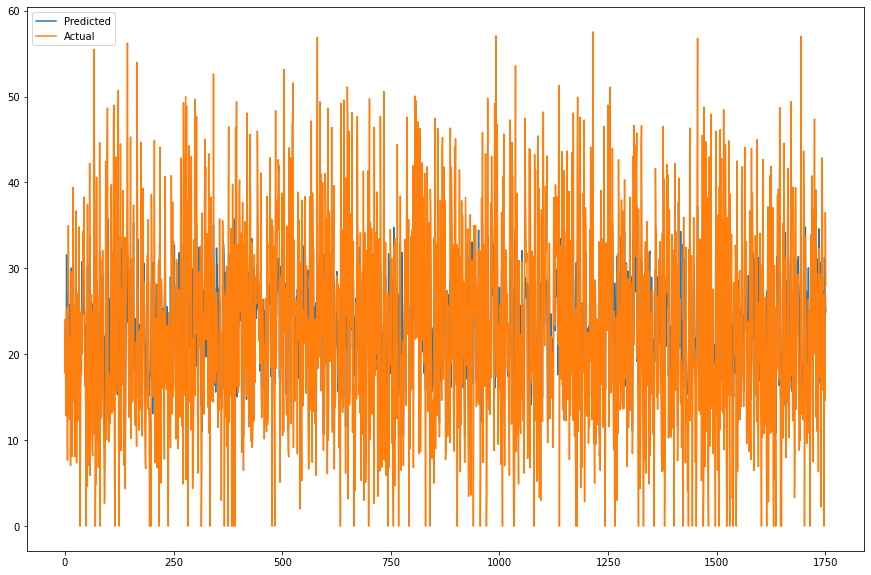

In [ ]:
#plot between predicted y values and actual y values
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_ela))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 1.0, 'Actual v/s Predicted')

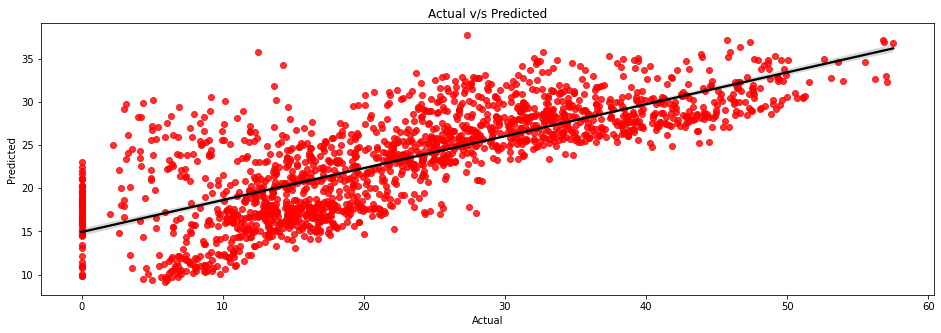

In [ ]:
 #plot scatter plot for y_test and y_actual and also Checking how predicted values and actual values are close  to the regression line
plt.figure(figsize=(16,5))
sns.regplot(x=y_test,y=y_pred_test_ela,scatter_kws={'color':'red'},line_kws={'color':'black'})
plt.xlabel('Actual')
plt.ylabel("Predicted")
plt.title("Actual v/s Predicted")

Text(0.5, 0, 'y_predicted')

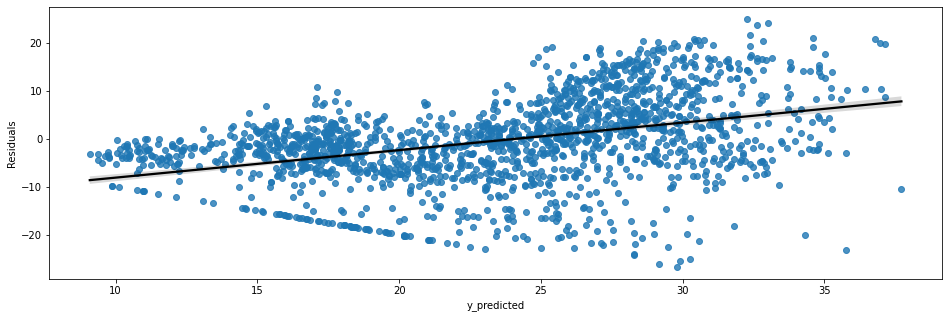

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred_test_ela,y=y_test-y_pred_test_ela,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual Distribution')

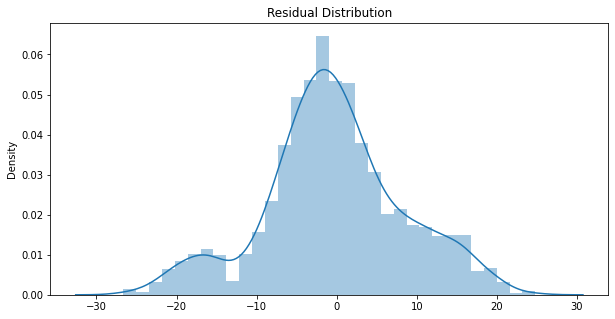

In [ ]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed).
 #Mean of residuals should be zero or close to 0 as much as possible. It is done to check whether our line is actually the line of “best fit”
plt.figure(figsize=(10,5))
sns.distplot(x=y_test-y_pred_test_ela)
plt.title("Residual Distribution")

# **RANDOM FOREST**

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
#check the score
rf_model.score(X_train, y_train)

0.9876903012424728

In [ ]:
# y predictions on training dataset
y_pred_train_rf=rf_model.predict(X_train)

# y predictions on test dataset
y_pred_test_rf=rf_model.predict(X_test)

In [ ]:
# predicted train values
y_pred_train_rf

array([19.51293063, 53.04015634, 26.49736199, ..., 32.552085  ,
       19.47739602, 23.04558647])

In [ ]:
# predicted test values
y_pred_test_rf

array([18.75417119, 26.21568873, 15.72170872, ..., 22.09147142,
       33.59302696, 29.19970683])

FIRST WE CALCULATE FOR TRAINING DATA.

In [ ]:
# Evaluation of Train data set

#Calculate  Mean Squared Error
MSE= mean_squared_error((y_train), (y_pred_train_rf))
print("MSE :",MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

#Calculate  Mean Absolute Error
MAE= mean_absolute_error(y_train, y_pred_train_rf)
print("MAE :",MAE)

#Calculate R2 Score
r2= r2_score(y_train, y_pred_train_rf)
print("R2 :",r2)

#Calculate Adjusted R2 Score
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 1.8997942481756933
RMSE : 1.3783302391573993
MAE : 0.844816860975248
R2 : 0.9876903012424728
Adjusted R2 : 0.9873656022717291


In [ ]:
#STORING THE TRAIN DATA
dict1={'Model':'Random forest regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

THEN WE CALCULATE FOR TEST DATA.

In [ ]:
# Evaluation of Test data set

#Calculate  Mean Squared Error
MSE= mean_squared_error((y_test), (y_pred_test_rf))
print("MSE :",MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

#Calculate  Mean Absolute Error
MAE= mean_absolute_error(y_test, y_pred_test_rf)
print("MAE :",MAE)

#Calculate R2 Score
r2= r2_score(y_test, y_pred_test_rf)
print("R2 :",r2)

#Calculate Adjusted R2 Score
Adjusted_R2=(1-(1-r2_score((y_test), (y_pred_test_rf)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_rf)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 12.735174146162933
RMSE : 3.568637575625036
MAE : 2.2228095745433705
R2 : 0.9191346954686054
Adjusted R2 : 0.9170016716093364


In [ ]:
#STORING THE TEST DATA
dict2={'Model':'Random forest regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2 ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

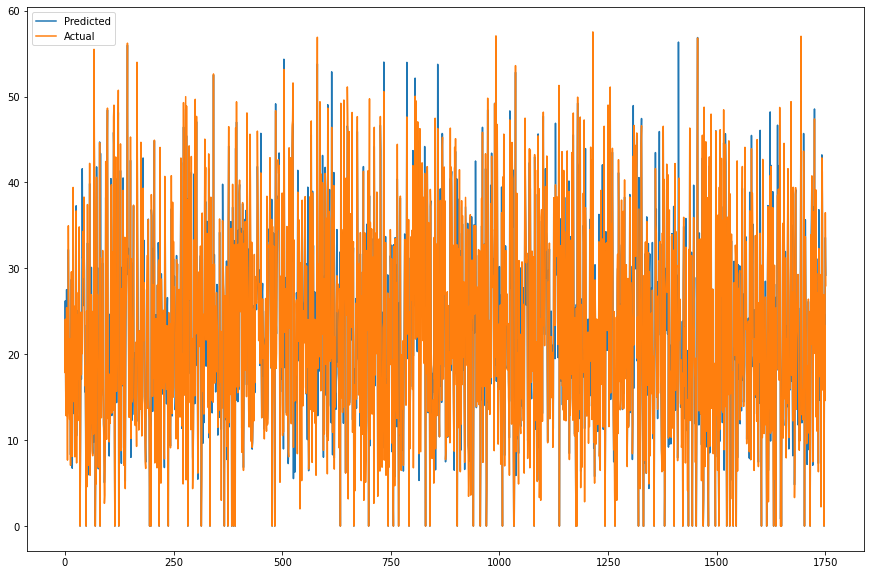

In [ ]:
#plot between predicted y values and actual y values
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_rf))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 1.0, 'Actual v/s Predicted')

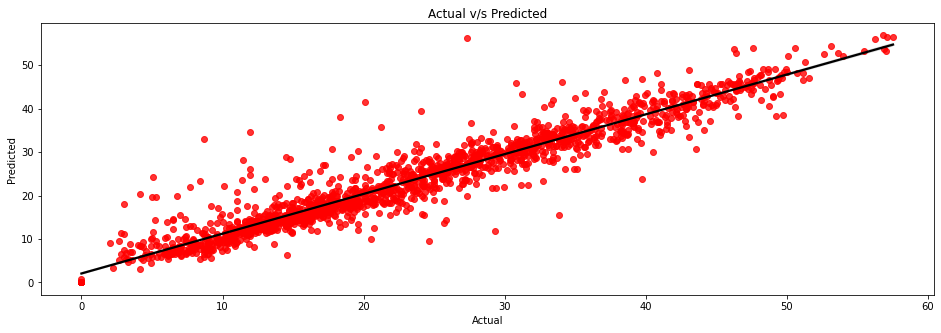

In [ ]:
 #plot scatter plot for y_test and y_actual and also Checking how predicted values and actual values are close  to the regression line
plt.figure(figsize=(16,5))
sns.regplot(x=y_test,y=y_pred_test_rf,scatter_kws={'color':'red'},line_kws={'color':'black'})
plt.xlabel('Actual')
plt.ylabel("Predicted")
plt.title("Actual v/s Predicted")

Text(0.5, 0, 'y_predicted')

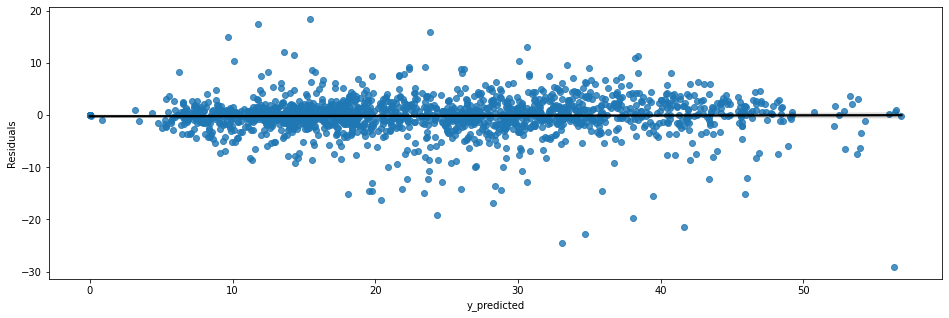

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred_test_rf,y=y_test-y_pred_test_rf,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual Distribution')

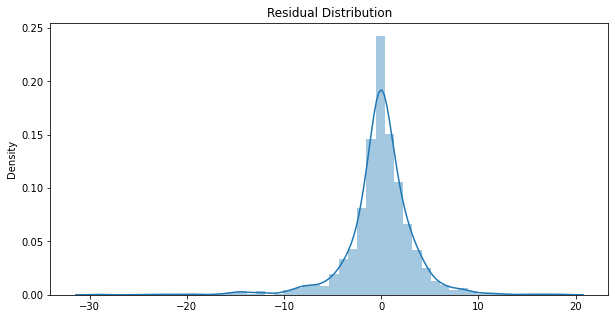

In [ ]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed).
 #Mean of residuals should be zero or close to 0 as much as possible. It is done to check whether our line is actually the line of “best fit”
plt.figure(figsize=(10,5))
sns.distplot(x=y_test-y_pred_test_rf)
plt.title("Residual Distribution")

In [ ]:
rf_model.feature_importances_

array([0.32993604, 0.02102492, 0.05673561, 0.11884168, 0.00274884,
       0.00470107, 0.01052264, 0.01807368, 0.02880408, 0.02630025,
       0.01035502, 0.00472227, 0.01241966, 0.00151843, 0.00344431,
       0.00202232, 0.00045392, 0.0005765 , 0.00056676, 0.00152051,
       0.00388358, 0.01166727, 0.03065368, 0.01810052, 0.01660239,
       0.0182129 , 0.01522793, 0.00713032, 0.00448616, 0.00111057,
       0.00946714, 0.00483622, 0.15106575, 0.00035298, 0.00470841,
       0.00156521, 0.00195395, 0.00253609, 0.00088715, 0.00203717,
       0.00118652, 0.00534135, 0.00750148, 0.00099185, 0.02320488])

In [ ]:
##Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.33
32,Functioning_Day_Yes,0.15
3,Rainfall,0.12
2,Solar_Radiation,0.06
8,Hour_4,0.03
9,Hour_5,0.03
22,Hour_18,0.03
7,Hour_3,0.02
1,Wind_speed,0.02
25,Hour_21,0.02


In [ ]:
features = X.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

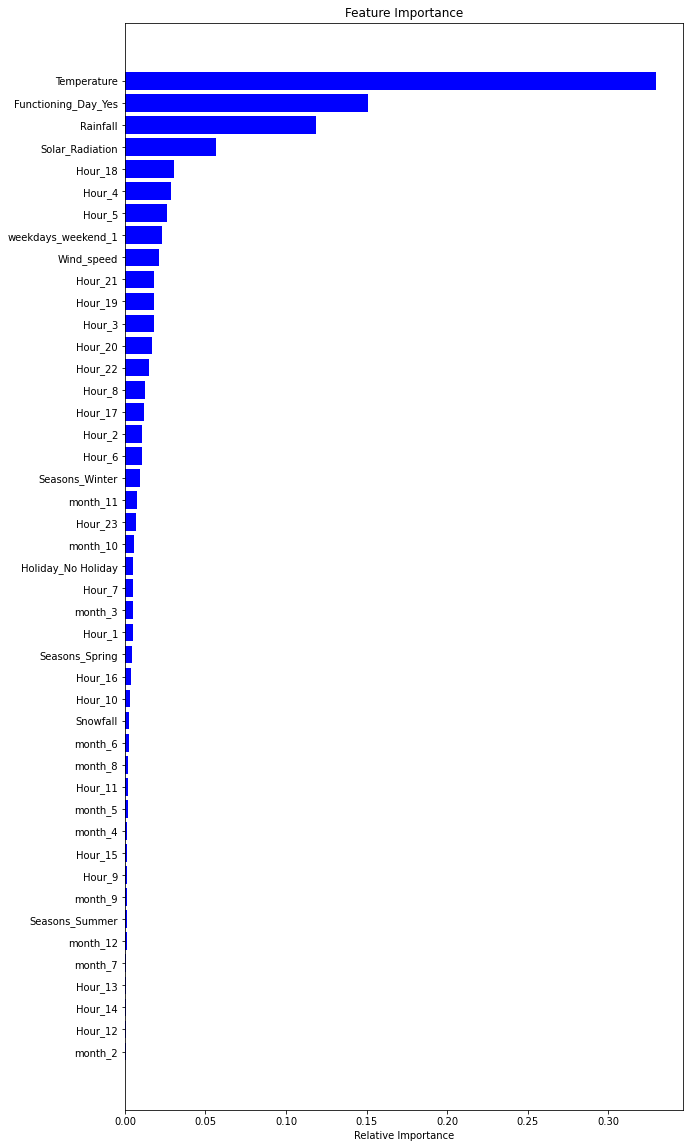

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

By looking at the graph we can say that temperature and hours plays very important role on bike rentals

#**CONCLUSION**

During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables


1. As we have calculated MAE,MSE,RMSE and R2 score for each model. Based on r2 score will decide our model performance

2. Our assumption: if the differnece of R2 score between Train data and Test is more than 5 % we will consider it as overfitting.





In [ ]:
# Check Final dataframe of All models

result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  R2_score  \
Training set 0        Linear regression   4.668  39.509  6.286     0.744   
             1         Lasso regression   4.674  39.763  6.306     0.742   
             2         Ridge regression   4.669  39.509  6.286     0.744   
             3   Elastic Net regression   6.592  73.912  8.597     0.521   
             4  Random forest regression  0.845   1.900  1.378     0.988   
Test set     0        Linear regression   4.667  38.355  6.193     0.756   
             1         Lasso regression   4.677  38.809  6.230     0.754   
             2         Ridge regression   4.669  38.379  6.195     0.756   
             3   Elastic Net regression   6.753  78.215  8.844     0.503   
             4  Random forest regression  2.223  12.735  3.569     0.919   

                Adjusted R2  
Training set 0         0.74  
             1         0.74  
             2         0.74  
             3         0.51  
             4         0.99  
Test set     0         0.75  
             1         0.75  
             2         0.75  
             3         0.49  
             4         0.92

# **Conclusions:**


As we have calculated MAE,MSE,RMSE and R2 score for each model. Based on r2 score will decide our model performance.

Our assumption: if the differnece of R2 score between Train data and Test is more than 5 % we will consider it as overfitting.

# **Linear,Lasso,Ridge and ElasticNet.**

From The above data frame, we can see that linear,Lasso,Ridge regression models have almost similar R2 scores(74%) on both training and test data

Random forest performed best as compared to other models with

Adjusted R2-Score for test dataset = 0.92

MSE for test dataset = 12.375

Linear Regression is the least accurate as compared to other models performed.

Adjusted R2-Score for test dataset = 0.74

MSE for test dataset      = 38.355